In [1]:
# importing packages
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
# reading in CSV
df = pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
190540,128876.0,-1.830095,-0.137589,1.165411,-1.418749,0.488531,0.139580,0.188627,0.688763,-0.338800,...,0.039765,-0.588418,-0.004024,0.168532,0.491266,-0.269562,-0.141380,-0.120216,120.91,0
112155,72534.0,-0.202463,0.465210,0.834892,-2.227735,-0.661110,-0.724424,-0.762919,-2.832620,0.974169,...,-1.515120,-0.131052,-0.065134,0.438298,1.007102,-0.291745,0.053908,0.220345,3.11,0
243183,151832.0,0.306229,-0.424771,-1.380784,-1.913211,0.842114,-1.483000,0.814543,-0.347066,-1.455849,...,0.619341,1.513879,0.244803,-0.394509,-1.512426,-0.348385,0.265300,0.328686,65.34,0
170387,120156.0,0.272050,-4.520426,-3.177580,-0.785983,-1.742056,-1.093717,1.056694,-0.672331,-2.172298,...,0.674317,-0.095774,-0.899055,0.049258,-0.163474,-0.046153,-0.265128,0.095606,1076.90,0
240888,150794.0,2.046962,-0.380968,-0.526156,0.345999,-0.434451,-0.190540,-0.614142,-0.025013,1.493828,...,0.140722,0.701002,0.032785,-0.685823,0.013241,-0.168146,0.043882,-0.045200,0.01,0


In [3]:
# Check the types of response for the response variable (in this case, it's just 0 and 1)

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df_zero = df[df['Class'] == 0]
df_one = df[df['Class'] == 1]

In [6]:
df_zero.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df_one.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [8]:
# Shuffle dataframe for response=0 and =1 so that train-test will not be biased in case rows that are similar are placed side by side
# Later on, we will reset the index and select by the index number by sections
from sklearn.utils import shuffle
df_zero = shuffle(df_zero)
df_one = shuffle(df_one)

In [9]:
df_zero.head(10)
# Notice indexes are scrambled now, meaning the DF is shuffled
# Now we need to reset indexes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46957,43006.0,1.137622,0.174313,0.404251,1.087450,-0.247634,-0.417979,0.041166,-0.033588,0.105511,...,-0.014668,-0.060018,-0.009794,0.053553,0.447414,-0.410587,0.031298,0.026130,31.31,0
272380,165059.0,1.954320,-0.601255,-0.336373,0.318712,-0.726208,-0.037220,-0.849702,0.196205,1.196176,...,0.185757,0.675356,0.130278,-0.367591,-0.321441,0.578047,-0.027790,-0.062811,11.50,0
181205,124873.0,1.993000,0.105581,-1.478922,0.656160,0.049561,-1.133651,0.093379,-0.131271,0.371934,...,-0.304203,-0.822471,0.324402,-0.069119,-0.339543,-0.004205,-0.053316,-0.041599,2.50,0
186435,127105.0,-0.479911,-0.972557,-0.390000,-0.946455,-1.269423,-0.266654,2.122984,-0.428420,-1.204221,...,0.297067,0.698181,0.816703,-0.056342,0.140769,-0.105647,-0.063932,0.073933,453.50,0
179281,124002.0,1.965279,-1.749666,-0.846317,-2.779776,-1.235533,-0.150039,-1.094504,-0.075989,1.674848,...,-0.220130,-0.117468,0.100612,0.036531,-0.208024,-0.915857,0.105922,0.003541,136.69,0
188589,128041.0,2.129589,-0.740330,-1.256627,-0.640444,-0.693516,-0.687919,-0.961282,-0.046848,0.142140,...,0.230416,0.667023,0.131008,0.618278,-0.148570,-0.120337,0.018068,-0.004009,29.95,0
266508,162363.0,2.089685,0.081443,-2.190706,-0.150552,0.736869,-1.105564,0.676433,-0.394297,-0.098715,...,0.200808,0.653204,-0.019816,0.827394,0.427329,0.183495,-0.094322,-0.080474,7.70,0
98039,66491.0,1.038279,-0.130291,1.033925,1.655057,-0.744910,0.105462,-0.344991,0.150649,0.861917,...,-0.047036,0.163616,-0.055206,0.434549,0.555950,-0.281158,0.067173,0.030920,38.00,0
235331,148343.0,2.157284,-0.889160,-0.933233,-1.066889,-0.725819,-0.624452,-0.727242,-0.038927,-0.369495,...,-0.242153,-0.870052,0.420634,-0.582597,-0.561018,-0.676131,-0.025561,-0.059520,20.95,0
264624,161509.0,-0.442574,1.200402,-0.120958,-0.535542,1.456946,-1.287098,2.037456,-0.419745,-0.995552,...,0.264501,0.651615,-0.221086,1.138757,0.290194,-0.809409,0.093909,0.171767,37.95,0


In [10]:
df_one.head(10)
# Notice indexes are scrambled now, meaning the DF is shuffled
# Now we need to reset indexes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192687,129808.0,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,276.17,1
59539,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
128479,78725.0,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,...,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,60.00,1
43204,41413.0,-15.140450,7.378042,-16.356367,9.194935,-13.466163,-2.958431,-16.165539,10.075254,-7.901821,...,3.147428,0.341678,-1.150162,0.795190,-0.194542,0.145964,-2.458680,-1.189888,106.55,1
42741,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
218442,141320.0,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,...,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,195.66,1
261925,160243.0,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1
213092,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
12369,21662.0,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.00,1
47802,43369.0,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1


In [11]:
df_zero = df_zero.reset_index(drop=True)
df_one = df_one.reset_index(drop=True)

In [12]:
df_zero.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,43006.0,1.137622,0.174313,0.404251,1.087450,-0.247634,-0.417979,0.041166,-0.033588,0.105511,...,-0.014668,-0.060018,-0.009794,0.053553,0.447414,-0.410587,0.031298,0.026130,31.31,0
1,165059.0,1.954320,-0.601255,-0.336373,0.318712,-0.726208,-0.037220,-0.849702,0.196205,1.196176,...,0.185757,0.675356,0.130278,-0.367591,-0.321441,0.578047,-0.027790,-0.062811,11.50,0
2,124873.0,1.993000,0.105581,-1.478922,0.656160,0.049561,-1.133651,0.093379,-0.131271,0.371934,...,-0.304203,-0.822471,0.324402,-0.069119,-0.339543,-0.004205,-0.053316,-0.041599,2.50,0
3,127105.0,-0.479911,-0.972557,-0.390000,-0.946455,-1.269423,-0.266654,2.122984,-0.428420,-1.204221,...,0.297067,0.698181,0.816703,-0.056342,0.140769,-0.105647,-0.063932,0.073933,453.50,0
4,124002.0,1.965279,-1.749666,-0.846317,-2.779776,-1.235533,-0.150039,-1.094504,-0.075989,1.674848,...,-0.220130,-0.117468,0.100612,0.036531,-0.208024,-0.915857,0.105922,0.003541,136.69,0
5,128041.0,2.129589,-0.740330,-1.256627,-0.640444,-0.693516,-0.687919,-0.961282,-0.046848,0.142140,...,0.230416,0.667023,0.131008,0.618278,-0.148570,-0.120337,0.018068,-0.004009,29.95,0
6,162363.0,2.089685,0.081443,-2.190706,-0.150552,0.736869,-1.105564,0.676433,-0.394297,-0.098715,...,0.200808,0.653204,-0.019816,0.827394,0.427329,0.183495,-0.094322,-0.080474,7.70,0
7,66491.0,1.038279,-0.130291,1.033925,1.655057,-0.744910,0.105462,-0.344991,0.150649,0.861917,...,-0.047036,0.163616,-0.055206,0.434549,0.555950,-0.281158,0.067173,0.030920,38.00,0
8,148343.0,2.157284,-0.889160,-0.933233,-1.066889,-0.725819,-0.624452,-0.727242,-0.038927,-0.369495,...,-0.242153,-0.870052,0.420634,-0.582597,-0.561018,-0.676131,-0.025561,-0.059520,20.95,0
9,161509.0,-0.442574,1.200402,-0.120958,-0.535542,1.456946,-1.287098,2.037456,-0.419745,-0.995552,...,0.264501,0.651615,-0.221086,1.138757,0.290194,-0.809409,0.093909,0.171767,37.95,0


In [13]:
df_one.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,129808.0,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,276.17,1
1,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
2,78725.0,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,...,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,60.00,1
3,41413.0,-15.140450,7.378042,-16.356367,9.194935,-13.466163,-2.958431,-16.165539,10.075254,-7.901821,...,3.147428,0.341678,-1.150162,0.795190,-0.194542,0.145964,-2.458680,-1.189888,106.55,1
4,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
5,141320.0,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,...,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,195.66,1
6,160243.0,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1
7,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
8,21662.0,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.00,1
9,43369.0,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1


In [14]:
# Get number of rows
df_one.shape[0]

492

### Attempt to build for loop for cross validation - to select the right indexes

In [15]:
# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/5))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
    

98
Getting DF from index 0 to 98
Getting DF from index 98 to 196
Getting DF from index 196 to 294
Getting DF from index 294 to 392
Getting DF from index 392 to 492


In [16]:
df_one.iloc[0:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,129808.0,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,276.17,1
1,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
2,78725.0,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,...,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,60.00,1
3,41413.0,-15.140450,7.378042,-16.356367,9.194935,-13.466163,-2.958431,-16.165539,10.075254,-7.901821,...,3.147428,0.341678,-1.150162,0.795190,-0.194542,0.145964,-2.458680,-1.189888,106.55,1
4,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,154181.0,-0.549615,2.219075,-3.522024,0.236995,1.087469,-1.235530,-0.279313,0.514361,-1.849927,...,0.364130,0.210428,-0.366019,0.015803,0.349212,0.647302,0.171929,0.117188,0.76,1
488,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90,1
489,155965.0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,...,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77,1
490,27252.0,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,99.99,1


In [17]:
df_one.iloc[491]

Time      18399.000000
V1          -14.474437
V2            6.503185
V3          -17.712632
V4           11.270352
V5           -4.150142
V6           -3.372098
V7          -16.535807
V8           -1.443947
V9           -6.815273
V10         -13.670545
V11          10.545263
V12         -15.022700
V13           0.171633
V14         -15.066374
V15          -0.259576
V16          -8.668739
V17         -12.804141
V18          -5.116620
V19           0.579200
V20           1.101250
V21          -2.475962
V22           0.342391
V23          -3.564508
V24          -0.818140
V25           0.153408
V26           0.755079
V27           2.706566
V28          -0.992916
Amount        1.000000
Class         1.000000
Name: 491, dtype: float64

### Selecting different sections of dataset with k-fold cross validation loop (k=5)

In [19]:
# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:end_index])
    

98
Getting DF from index 0 to 98
        Time         V1        V2         V3        V4         V5        V6  \
0   129808.0   1.522080 -0.519429  -2.581685  0.774741   0.206722 -1.431020   
1    48884.0  -2.139051  1.394368  -0.612035  1.049327  -1.162102 -0.768219   
2    78725.0  -4.312479  1.886476  -2.338634 -0.475243  -1.185444 -2.112079   
3    41413.0 -15.140450  7.378042 -16.356367  9.194935 -13.466163 -2.958431   
4    41227.0  -9.001351  6.613284 -12.423635  7.519929 -10.266255 -2.113208   
..       ...        ...       ...        ...       ...        ...       ...   
93   42985.0  -4.075975  0.963031  -5.076070  4.955963  -0.161437 -2.832663   
94   64785.0  -8.744415 -3.420468  -4.850575  6.606846  -2.800546  0.105512   
95   93860.0 -10.850282  6.727466 -16.760583  8.425832 -10.252697 -4.192171   
96   88672.0  -3.859881  2.632881  -5.264265  3.446113  -0.675231 -1.904959   
97   50808.0  -9.169790  7.092197 -12.354037  4.243069  -7.176438 -3.386618   

           V7     

In [20]:
# Cross validation number of splits
n = 6

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:end_index])
    

82
Getting DF from index 0 to 82
        Time         V1        V2         V3        V4         V5        V6  \
0   129808.0   1.522080 -0.519429  -2.581685  0.774741   0.206722 -1.431020   
1    48884.0  -2.139051  1.394368  -0.612035  1.049327  -1.162102 -0.768219   
2    78725.0  -4.312479  1.886476  -2.338634 -0.475243  -1.185444 -2.112079   
3    41413.0 -15.140450  7.378042 -16.356367  9.194935 -13.466163 -2.958431   
4    41227.0  -9.001351  6.613284 -12.423635  7.519929 -10.266255 -2.113208   
..       ...        ...       ...        ...       ...        ...       ...   
77  102318.0  -1.020632  1.496959  -4.490937  1.836727   0.627318 -2.735569   
78   37167.0  -7.923891 -5.198360  -3.000024  4.420666   2.272194 -3.394483   
79   29753.0   0.269614  3.549755  -5.810353  5.809370   1.538808 -2.269219   
80  125612.0   1.889618  1.073099  -1.678018  4.173268   1.015516 -0.009389   
81  133958.0   0.523820  1.531708  -4.176390  3.584615  -1.023954 -0.502471   

           V7     

## To do stratified cross validation, we need to split the DFs into response 0s and 1s
### We shuffle both DFs
### Subsequently, we choose the first 20% of 0s and 20% of 1s and concat them together to be the test dataset
### The other 80% of 0s and 1s will become the training dataset
### This ensures every fold will have the same amount (balanced) number of fraud positive cases for training/testing
### Loop and select different sections of the dataset

In [21]:
# Besides getting the DF for the current section, we need to concat the two DFs (before start index and after end index) not in that section

# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        print('\n')
        print('Getting TRAIN DF from index 0 to ' + str(start_index) + ' and from index ' + str(end_index) + ' to ' + str(df_one.shape[0]))
        print(pd.concat([df_one.iloc[0:start_index],df_one.iloc[end_index:]], axis=0))
        print('\n')
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:df_one.shape[0]])
        print('Getting TRAIN DF from index 0 to ' + str(start_index))
        print(df_one.iloc[0:start_index])
    

98
Getting TEST DF from index 0 to 98
        Time         V1        V2         V3        V4         V5        V6  \
0   129808.0   1.522080 -0.519429  -2.581685  0.774741   0.206722 -1.431020   
1    48884.0  -2.139051  1.394368  -0.612035  1.049327  -1.162102 -0.768219   
2    78725.0  -4.312479  1.886476  -2.338634 -0.475243  -1.185444 -2.112079   
3    41413.0 -15.140450  7.378042 -16.356367  9.194935 -13.466163 -2.958431   
4    41227.0  -9.001351  6.613284 -12.423635  7.519929 -10.266255 -2.113208   
..       ...        ...       ...        ...       ...        ...       ...   
93   42985.0  -4.075975  0.963031  -5.076070  4.955963  -0.161437 -2.832663   
94   64785.0  -8.744415 -3.420468  -4.850575  6.606846  -2.800546  0.105512   
95   93860.0 -10.850282  6.727466 -16.760583  8.425832 -10.252697 -4.192171   
96   88672.0  -3.859881  2.632881  -5.264265  3.446113  -0.675231 -1.904959   
97   50808.0  -9.169790  7.092197 -12.354037  4.243069  -7.176438 -3.386618   

           V7

         Time         V1         V2         V3         V4         V5  \
0    129808.0   1.522080  -0.519429  -2.581685   0.774741   0.206722   
1     48884.0  -2.139051   1.394368  -0.612035   1.049327  -1.162102   
2     78725.0  -4.312479   1.886476  -2.338634  -0.475243  -1.185444   
3     41413.0 -15.140450   7.378042 -16.356367   9.194935 -13.466163   
4     41227.0  -9.001351   6.613284 -12.423635   7.519929 -10.266255   
..        ...        ...        ...        ...        ...        ...   
487  154181.0  -0.549615   2.219075  -3.522024   0.236995   1.087469   
488   72327.0  -4.198735   0.194121  -3.917586   3.920748  -1.875486   
489  155965.0  -1.201398   4.864535  -8.328823   7.652399  -0.167445   
490   27252.0 -25.942434  14.601998 -27.368650   6.378395 -19.104033   
491   18399.0 -14.474437   6.503185 -17.712632  11.270352  -4.150142   

           V6         V7         V8        V9  ...       V21       V22  \
0   -1.431020   0.757011  -0.444418  0.997921  ...  0.019649 

[392 rows x 31 columns]


In [22]:
# Try splitting by 7

# Cross validation number of splits
n = 7

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        print('\n')
        print('Getting TRAIN DF from index 0 to ' + str(start_index) + ' and from index ' + str(end_index) + ' to ' + str(df_one.shape[0]))
        print(pd.concat([df_one.iloc[0:start_index],df_one.iloc[end_index:]], axis=0))
        print('\n')
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:df_one.shape[0]])
        print('Getting TRAIN DF from index 0 to ' + str(start_index))
        print(df_one.iloc[0:start_index])
    

70
Getting TEST DF from index 0 to 70
        Time         V1        V2         V3        V4         V5        V6  \
0   129808.0   1.522080 -0.519429  -2.581685  0.774741   0.206722 -1.431020   
1    48884.0  -2.139051  1.394368  -0.612035  1.049327  -1.162102 -0.768219   
2    78725.0  -4.312479  1.886476  -2.338634 -0.475243  -1.185444 -2.112079   
3    41413.0 -15.140450  7.378042 -16.356367  9.194935 -13.466163 -2.958431   
4    41227.0  -9.001351  6.613284 -12.423635  7.519929 -10.266255 -2.113208   
..       ...        ...       ...        ...       ...        ...       ...   
65  133731.0   1.176633  3.141918  -6.140445  5.521821   1.768515 -1.727186   
66   88737.0   1.917827  0.951967  -2.059206  3.833998   1.668192  0.769826   
67   77154.0  -0.715414  0.608590   1.155501 -0.267565  -0.563748 -0.618898   
68   85181.0  -3.003459  2.096150  -0.487030  3.069453  -1.774329  0.251804   
69  129741.0  -1.396204  2.618584  -6.036770  3.552454   1.030091 -2.950358   

           V7

[422 rows x 31 columns]


Getting TEST DF from index 280 to 350
         Time         V1         V2         V3         V4         V5  \
280    8808.0  -4.617217   1.695694  -3.114372   4.328199  -1.873257   
281   71033.0  -3.170818   0.185735  -3.399852   3.761155  -2.148047   
282   20011.0 -14.724627   7.875157 -21.872317  11.906170  -8.348734   
283  143354.0   1.118331   2.074439  -3.837518   5.448060   0.071816   
284   65358.0   1.193916  -0.571085   0.742522  -0.014588  -0.624561   
..        ...        ...        ...        ...        ...        ...   
345   54846.0  -2.986466  -0.000891   0.605887   0.338338   0.685448   
346  100223.0 -19.641857  14.706335 -22.801238  12.114672 -14.898113   
347   86376.0  -0.670238   0.945206   0.610051   2.640065  -2.707775   
348  139816.0  -0.395582  -0.751792  -1.984666  -0.203459   1.903967   
349    8886.0  -2.535852   5.793644  -7.618463   6.395830  -0.065210   

           V6         V7         V8        V9  ...       V21       V22 

[422 rows x 31 columns]


Getting TEST DF from index 420 to 492
         Time         V1         V2         V3         V4         V5  \
420   28143.0 -27.143678  15.365804 -28.407424   6.370895 -20.087878   
421   40086.0   1.083693   1.179501  -1.346150   1.998824   0.818034   
422   35899.0  -2.857170   4.045601  -4.197299   5.487199  -3.070776   
423   84789.0  -1.430864  -0.802529   1.123320   0.389760  -0.281214   
424    8528.0   0.447396   2.481954  -5.660814   4.455923  -2.443780   
..        ...        ...        ...        ...        ...        ...   
487  154181.0  -0.549615   2.219075  -3.522024   0.236995   1.087469   
488   72327.0  -4.198735   0.194121  -3.917586   3.920748  -1.875486   
489  155965.0  -1.201398   4.864535  -8.328823   7.652399  -0.167445   
490   27252.0 -25.942434  14.601998 -27.368650   6.378395 -19.104033   
491   18399.0 -14.474437   6.503185 -17.712632  11.270352  -4.150142   

           V6         V7         V8        V9  ...       V21       V22 

# New model pipeline with cross validation (set n_fold)

### varlist argument for run_model 
### Specify the dataframe df
### varlist which is list of variables (needs to have response inside)
### response is response name in string
### standardize is whether to standardize variables (can change list of vars to standardize)
### sampletype is type of sampling to do
### modelname is type of model to use
### text is text to put for modelling
### n_fold is number of folds

In [51]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb 
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

class modelpipeline:
    def __init__(self):
        pass
    
    def run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold):
        # Remove any features not wanted based on varlist input and re-order based on varlist
        df = df[varlist]
        # We have to remove response from varlist - varlist_noresponse - as it is used later to subset out features
        # Refer to the for loop for the cross validation where X_train and X_test is created at the end of loop
        varlist_noresponse = []
        for col in varlist:
            if col != response:
                varlist_noresponse.append(col)
            
            
        if isinstance(n_fold, int) and n_fold > 1:
            # Initialize dictionary to store results
            self.store = {"accuracy": [], "actual_accuracy": [], "sensitivity": [], "specificity": [], 
                          "precision": [], "f1": [], "auc": [], "final": {}}
            
            # Split dataframes into 2, one for positive response and one for negative
            df_zero = df[df[response] == 0]
            df_one = df[df[response] == 1]
            
            # Shuffle dataframe for response=0 and =1 so that train-test will not be biased in case rows that are similar are placed side by side
            # Later on, we will reset the index and select by the index number by sections
            df_zero = shuffle(df_zero, random_state=42)
            df_one = shuffle(df_one, random_state=42)
            df_zero = df_zero.reset_index(drop=True)
            df_one = df_one.reset_index(drop=True)
        
            # Get the average number of records required for negative response and positive response for test records
            # Train records will then have all the other records not in the test records
            # n_fold is the number of folds for cross validation
            start_index_one = 0
            end_index_one = math.floor(df_one.shape[0]/n_fold)
            start_index_zero = 0
            end_index_zero = math.floor(df_zero.shape[0]/n_fold)
            
            for i in range(1,n_fold+1):
                if i != n_fold:
                    print('Getting TEST DF for response 1 from index ' + str(start_index_one) + ' to ' + str(end_index_one))
                    df_one_test = df_one.iloc[start_index_one:end_index_one]
                    print('Getting TRAIN DF for response 1 from index 0 to ' + str(start_index_one) + ' and from index ' + str(end_index_one) + ' to ' + str(df_one.shape[0]))
                    df_one_train = pd.concat([df_one.iloc[0:start_index_one],df_one.iloc[end_index_one:]], axis=0)
                    start_index_one += math.floor(df_one.shape[0]/n_fold)
                    end_index_one += math.floor(df_one.shape[0]/n_fold)
                    
                    print('Getting TEST DF for response 0 from index ' + str(start_index_zero) + ' to ' + str(end_index_zero))
                    df_zero_test = df_zero.iloc[start_index_zero:end_index_zero]
                    print('Getting TRAIN DF for response 0 from index 0 to ' + str(start_index_zero) + ' and from index ' + str(end_index_zero) + ' to ' + str(df_zero.shape[0]))
                    df_zero_train = pd.concat([df_zero.iloc[0:start_index_zero],df_zero.iloc[end_index_zero:]], axis=0)
                    start_index_zero += math.floor(df_zero.shape[0]/n_fold)
                    end_index_zero += math.floor(df_zero.shape[0]/n_fold)

                else:
                    # Last section of split needs to reach the end of dataset
                    print('Getting TEST DF for response 1 from index ' + str(start_index_one) + ' to ' + str(df_one.shape[0]))
                    df_one_test = df_one.iloc[start_index_one:df_one.shape[0]]
                    print('Getting TRAIN DF for response 1 from index 0 to ' + str(start_index_one))
                    df_one_train = df_one.iloc[0:start_index_one]
                    
                    # Last section of split needs to reach the end of dataset
                    print('Getting TEST DF for response 0 from index ' + str(start_index_zero) + ' to ' + str(df_zero.shape[0]))
                    df_zero_test = df_zero.iloc[start_index_zero:df_zero.shape[0]]
                    print('Getting TRAIN DF for response 0 from index 0 to ' + str(start_index_zero))
                    df_zero_train = df_zero.iloc[0:start_index_zero]
                    
                # Combine the subsetted sections for negatives and postives for both train and test before oversampling  
                df_train = pd.concat([df_one_train, df_zero_train], axis=0)
                df_test = pd.concat([df_one_test, df_zero_test], axis=0)
                # varlist_noresponse has the feature list X without Y while response is the Y
                # print(varlist_noresponse)
                X_train = df_train[varlist_noresponse]
                # print('Check X train vars after combining pds')
                # print(X_train.columns.values)
                y_train = df_train[response]
                X_test = df_test[varlist_noresponse]
                y_test = df_test[response]
                
                if standardize == True:
                    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
                    X_train = scaling.transform(X_train)
                    X_test = scaling.transform(X_test)
                    X_train = pd.DataFrame(X_train, columns=varlist_noresponse)
                    X_test = pd.DataFrame(X_test, columns=varlist_noresponse)

                if sampletype == 'smote':
                    X_train, X_test, y_train, y_test = sampling.smote_oversample(X_train, X_test, y_train, y_test, response)
                elif sampletype == 'adasyn':
                    X_train, X_test, y_train, y_test = sampling.adasyn_oversample(X_train, X_test, y_train, y_test, response)
                elif sampletype == 'naive':
                    X_train, X_test, y_train, y_test = sampling.naive_oversample(X_train, X_test, y_train, y_test, response)
                else:
                    # Convert all DF to numpy array for model building later
                    X_train = X_train.values
                    y_train = y_train.values
                    X_test = X_test.values
                    y_test = y_test.values
                
                # Build model in current fold/iteration and get accuracy, sensitivity, specificity, precision, f1, auc
                self.store = self.build_model(X_train, X_test, y_train, y_test, text, modelname, i, n_fold, self.store)
                
                # test model with all actual fraud results
                if standardize == True:
                    df_acc = pd.concat([pd.DataFrame(scaling.transform(df[varlist_noresponse]),columns=varlist_noresponse),df[response]],axis=1)
                    # print(df)
                    self.store['actual_accuracy'].append(evaluate.actual_acc(df_acc, self.store['model'], response))
                else:
                    self.store['actual_accuracy'].append(evaluate.actual_acc(df, self.store['model'], response))
                
            # Before results are returned, get average of all evaluation metrics and store in store['final'] section
            self.store['final']['accuracy'] = self.avg(self.store['accuracy'])
            self.store['final']['sensitivity'] = self.avg(self.store['sensitivity'])
            self.store['final']['specificity'] = self.avg(self.store['specificity'])
            self.store['final']['precision'] = self.avg(self.store['precision'])
            self.store['final']['f1'] = self.avg(self.store['f1'])
            self.store['final']['auc'] = self.avg(self.store['auc'])
            self.store['final']['actual_accuracy'] = self.avg(self.store['actual_accuracy'])
            
            print('Final Results of ' + str(n_fold) + ' fold CV:')
            print(self.store['final'])
            return self.store
        
        else:
            print('n fold must be an integer greater than 1')
            return self.store
    
    def build_model(self, X_train, X_test, y_train, y_test, text, modelname, i, n_fold, store):
        if modelname == 'LogisticRegression':
            model = LogisticRegression(max_iter=300, C=0.8, solver='liblinear')
            model.fit(X_train,y_train)
        elif modelname == 'XGBoost':
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1])),
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'XGBoostminus1':
            # XGBoost with one less depth
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1])-1),
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'XGBoostplus1':
            # XGBoost with one less depth
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1]))+1,
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'SVM_Linear':
            model = LinearSVC(random_state=42) # default C=1 (regularization parameter)
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear2':
            model = LinearSVC(random_state=42, C=2) 
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear0.5':
            model = LinearSVC(random_state=42, C=0.5)
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear0.3':
            model = LinearSVC(random_state=42, C=0.3)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForest':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForestminus1':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))-1
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForestminus2':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))-2
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        else:
            # Parameters based on gridsearchcv of modelname = logistic regresion
            # Leave parameter blank for modelname to run this instance of logistic regression
            model = LogisticRegression(C=0.8, max_iter=300, solver='liblinear')
            model.fit(X_train,y_train)
        
        y_predict = model.predict(X_test)
        store = evaluate.model_results(y_test, y_predict, text, store)
        
        # Store model for usage in measuring actual accuracy of fraud cases
        store['model'] = model
        print("Iteration " + str(i) + " out of " + str(n_fold) + " of CV for model fitting and obtaining results is complete!")
        print("\n")
        return store
    
    
    def avg(self, array):
        return sum(array) / len(array)

class sampling:
    def __init__(self):
        pass
    @staticmethod
    def naive_oversample(X_train, X_test, y_train, y_test, response):
        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def smote_oversample(X_train, X_test, y_train, y_test, response):
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for SMOTE:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def adasyn_oversample(X_train, X_test, y_train, y_test, response):
        X_train, y_train = ADASYN().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for ADASYN:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test



class evaluate:
    def __init__(self):
        pass
    
    @staticmethod
    def model_results(y_test, y_predict, text, store):
        cm = metrics.confusion_matrix(y_test, y_predict)
        print(cm)
        RFC_CM = pd.DataFrame(cm, ['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
        sns.heatmap(RFC_CM, annot=True, annot_kws={"size": 16}, cmap='Greens', linewidths=1, fmt='g')# font size
        sns.set(font_scale=1.4)#for label size
        plt.title("Confusion Matrix for " + text)

        # fix for mpl bug that cuts off top/bottom of seaborn viz
        b, t = plt.ylim() 
        b += 0.5 
        t -= 0.5 
        plt.ylim(b, t) 
        plt.show() 

        accuracy = metrics.accuracy_score(y_test, y_predict)
        # print('Accuracy: ' + str(accuracy))
        sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])
        recall = sensitivity
        # print('Sensitivity: ' + str(sensitivity))
        specificity = cm[0][0] / (cm[0][0] + cm[0][1])
        # print('Specificity: ' + str(specificity))
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
        # print('Precision: ' + str(precision))
        f1 = 2 * (recall * precision)/(recall + precision)
        # print('f1 score: ' + str(f1))
        auc = evaluate.ROC(y_test, y_predict, text)
        
        store['accuracy'].append(accuracy)
        store['sensitivity'].append(sensitivity)
        store['specificity'].append(specificity)
        store['precision'].append(precision)
        store['f1'].append(f1)
        store['auc'].append(auc)

        return store
    
    @staticmethod
    def ROC(y_test, y_predict, text):
        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        auc = metrics.roc_auc_score(y_test, y_predict)
        # print("AUC value is: " + str(auc))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for ' + text)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        return auc

    @staticmethod
    def actual_acc(df, model, response):
        allpositive = df[df[response] == 1]
        x_positive = allpositive.drop([response], axis=1)
        y_positive = allpositive[response]
        # Convert to numpy array due to XGBoost model.predict not working well for pandas
        x_positive = x_positive.values
        y_positive = y_positive.values
        y_pospredict = model.predict(x_positive)
        accuracy_positive = metrics.accuracy_score(y_positive, y_pospredict)
        # print("Accuracy with all fraud results is " + str(accuracy_positive * 100) + "%")
        return accuracy_positive

### Initialize class modelpipeline that will run through entire model pipeline from start to end

In [52]:
modelpipeline = modelpipeline()

### Remove unnecessary features (e.g. Time) that are not useful for the model
### Put this variable list (varlist) as a input to modelpipeline

In [53]:
varlist = list(df.columns.values)
varlist.remove('Time')
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 70
Getting TRAIN DF for response 1 from index 0 to 0 and from index 70 to 492
Getting TEST DF for response 0 from index 0 to 40616
Getting TRAIN DF for response 0 from index 0 to 0 and from index 40616 to 284315
Oversampling is complete!
[[39724   892]
 [    2    68]]


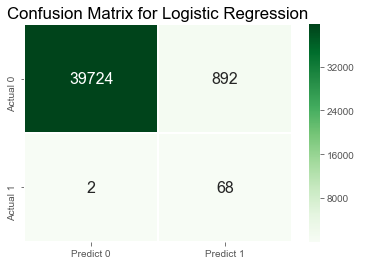

Iteration 1 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 70 to 140
Getting TRAIN DF for response 1 from index 0 to 70 and from index 140 to 492
Getting TEST DF for response 0 from index 40616 to 81232
Getting TRAIN DF for response 0 from index 0 to 40616 and from index 81232 to 284315
Oversampling is complete!
[[39688   928]
 [    7    63]]


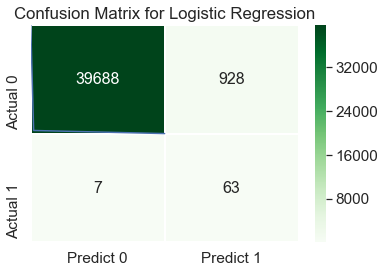

Iteration 2 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 140 to 210
Getting TRAIN DF for response 1 from index 0 to 140 and from index 210 to 492
Getting TEST DF for response 0 from index 81232 to 121848
Getting TRAIN DF for response 0 from index 0 to 81232 and from index 121848 to 284315
Oversampling is complete!
[[39779   837]
 [   10    60]]


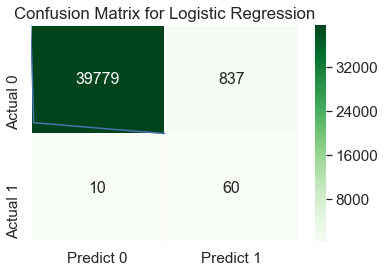

Iteration 3 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 210 to 280
Getting TRAIN DF for response 1 from index 0 to 210 and from index 280 to 492
Getting TEST DF for response 0 from index 121848 to 162464
Getting TRAIN DF for response 0 from index 0 to 121848 and from index 162464 to 284315
Oversampling is complete!
[[39727   889]
 [    5    65]]


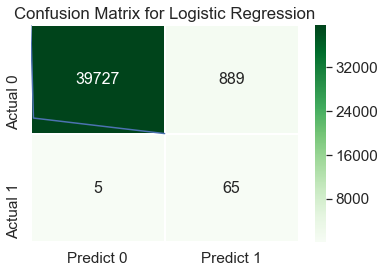

Iteration 4 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 280 to 350
Getting TRAIN DF for response 1 from index 0 to 280 and from index 350 to 492
Getting TEST DF for response 0 from index 162464 to 203080
Getting TRAIN DF for response 0 from index 0 to 162464 and from index 203080 to 284315
Oversampling is complete!
[[39740   876]
 [    8    62]]


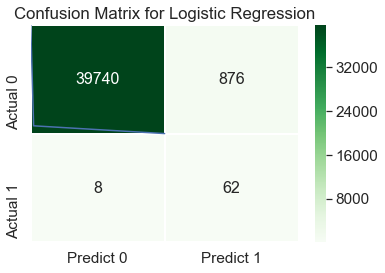

Iteration 5 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 350 to 420
Getting TRAIN DF for response 1 from index 0 to 350 and from index 420 to 492
Getting TEST DF for response 0 from index 203080 to 243696
Getting TRAIN DF for response 0 from index 0 to 203080 and from index 243696 to 284315
Oversampling is complete!
[[39666   950]
 [    3    67]]


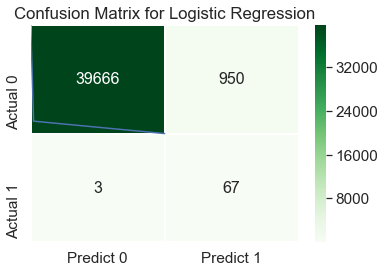

Iteration 6 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 420 to 492
Getting TRAIN DF for response 1 from index 0 to 420
Getting TEST DF for response 0 from index 243696 to 284315
Getting TRAIN DF for response 0 from index 0 to 243696
Oversampling is complete!
[[39669   950]
 [   10    62]]


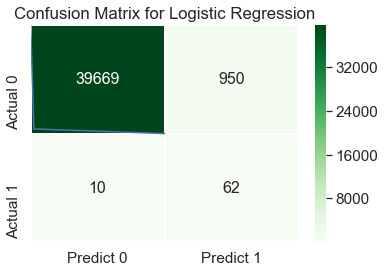

Iteration 7 out of 7 of CV for model fitting and obtaining results is complete!


Final Results of 7 fold CV:
{'accuracy': 0.9776445318579327, 'sensitivity': 0.9087301587301587, 'specificity': 0.9777641118356203, 'precision': 0.06609603274020268, 'f1': 0.12321786802174581, 'auc': 0.9432471352828895, 'actual_accuracy': 0.9155052264808363}


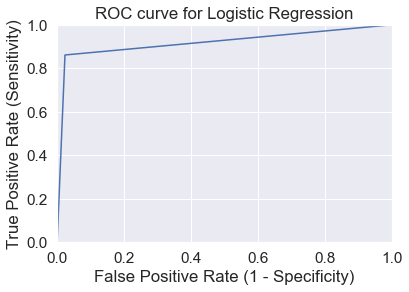

In [26]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'LogisticRegression', 'Logistic Regression', 7)

## results show the full results for all n folds - for the averaged results that have less variance, use results['final']

In [27]:
results

{'accuracy': [0.9780268396991594,
  0.9770191220567271,
  0.979182028216094,
  0.9780268396991594,
  0.9782726244899965,
  0.9765767094332203,
  0.976407559411172],
 'actual_accuracy': [0.9146341463414634,
  0.9146341463414634,
  0.9126016260162602,
  0.9186991869918699,
  0.9105691056910569,
  0.9207317073170732,
  0.9166666666666666],
 'sensitivity': [0.9714285714285714,
  0.9,
  0.8571428571428571,
  0.9285714285714286,
  0.8857142857142857,
  0.9571428571428572,
  0.8611111111111112],
 'specificity': [0.9780382115422493,
  0.9771518613354343,
  0.9793923576915501,
  0.978112074059484,
  0.9784321449675005,
  0.976610202875714,
  0.9766119303774096],
 'precision': [0.07083333333333333,
  0.06357214934409687,
  0.06688963210702341,
  0.06813417190775681,
  0.06609808102345416,
  0.06588003933136677,
  0.06126482213438735],
 'f1': [0.1320388349514563,
  0.11875589066918002,
  0.12409513960703206,
  0.12695312499999997,
  0.12301587301587302,
  0.12327506899724014,
  0.1143911439114391

In [28]:
results['final']

{'accuracy': 0.9776445318579327,
 'sensitivity': 0.9087301587301587,
 'specificity': 0.9777641118356203,
 'precision': 0.06609603274020268,
 'f1': 0.12321786802174581,
 'auc': 0.9432471352828895,
 'actual_accuracy': 0.9155052264808363}

### Try 7 fold cross validation instead of 5 for logistic regression

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55622  1241]
 [    6    92]]


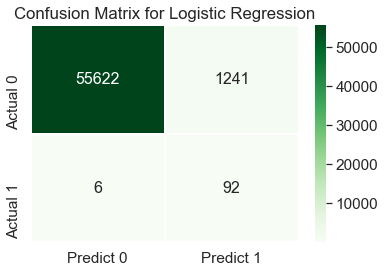

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55556  1307]
 [   10    88]]


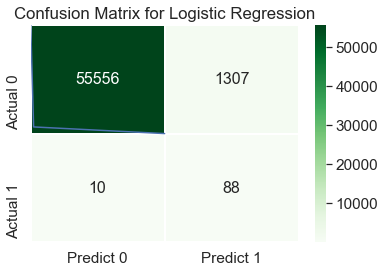

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55697  1166]
 [   10    88]]


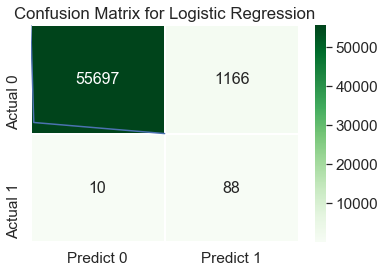

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55609  1254]
 [    9    89]]


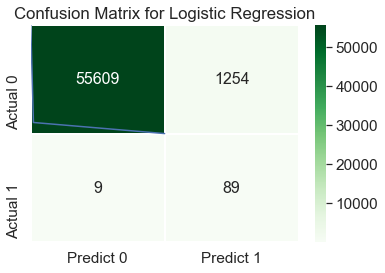

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55536  1327]
 [   13    87]]


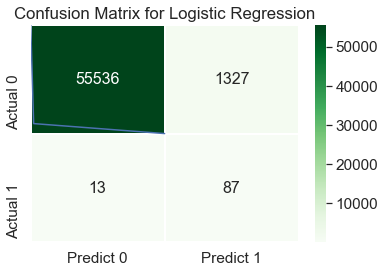

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9777287865314298, 'sensitivity': 0.9025714285714285, 'specificity': 0.9778590647697097, 'precision': 0.06601445146172352, 'f1': 0.12301901138720266, 'auc': 0.9402152466705692, 'actual_accuracy': 0.9150406504065041}


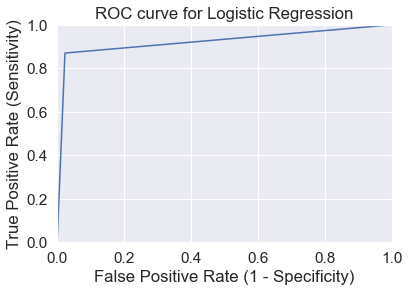

In [29]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'LogisticRegression', 'Logistic Regression', 5)

In [30]:
results['final']

{'accuracy': 0.9777287865314298,
 'sensitivity': 0.9025714285714285,
 'specificity': 0.9778590647697097,
 'precision': 0.06601445146172352,
 'f1': 0.12301901138720266,
 'auc': 0.9402152466705692,
 'actual_accuracy': 0.9150406504065041}

### Try SMOTE sampling, 5 fold CV for logistic regression

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55585  1278]
 [    6    92]]


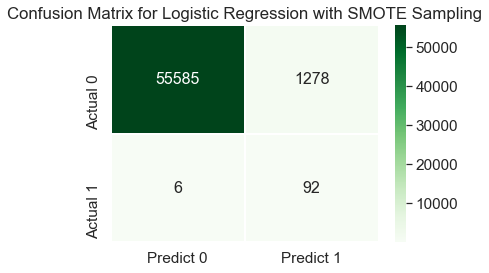

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55404  1459]
 [    9    89]]


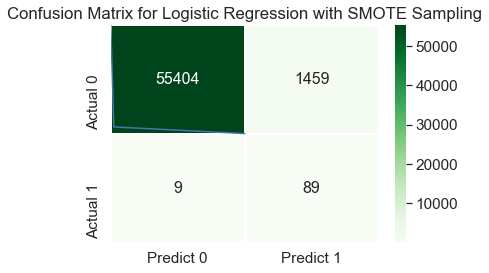

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55653  1210]
 [   10    88]]


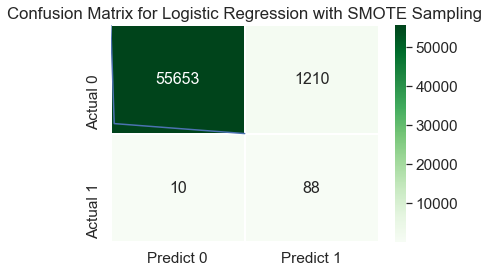

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55525  1338]
 [    8    90]]


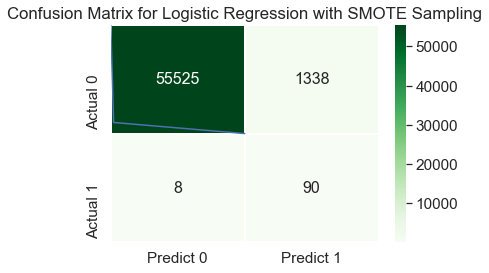

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55453  1410]
 [   12    88]]


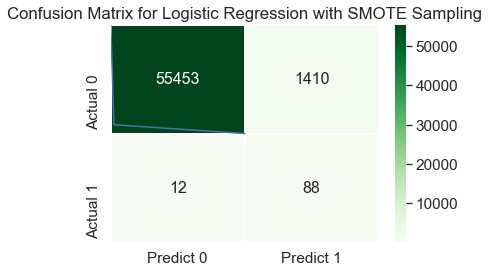

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.976334860438355, 'sensitivity': 0.9086530612244899, 'specificity': 0.9764521745247349, 'precision': 0.06284272766023404, 'f1': 0.11752983138419433, 'auc': 0.9425526178746122, 'actual_accuracy': 0.9158536585365853}


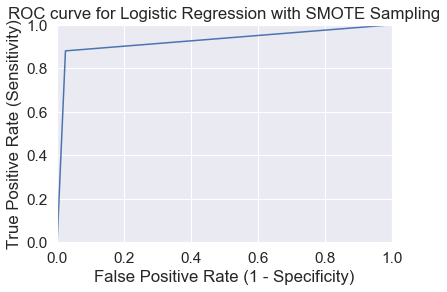

In [31]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'LogisticRegression', 'Logistic Regression with SMOTE Sampling', 5)

In [32]:
results['final']

{'accuracy': 0.976334860438355,
 'sensitivity': 0.9086530612244899,
 'specificity': 0.9764521745247349,
 'precision': 0.06284272766023404,
 'f1': 0.11752983138419433,
 'auc': 0.9425526178746122,
 'actual_accuracy': 0.9158536585365853}

### AUC values look good for logistic regression but precision and f1 score is low. Means there's many False Positives
### Or fraud suspected but actually False. It depends on the business context whether this is an issue

In [33]:
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


## Next, we try Random Forest for the pipeline, CV 5 fold. We try some tuning with different tree depth, and naive/smote sampling

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[56759   104]
 [   14    84]]


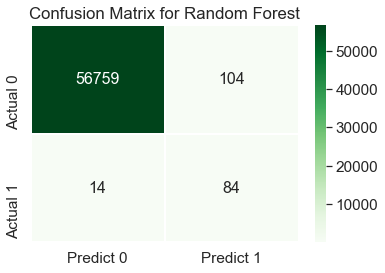

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[56755   108]
 [   10    88]]


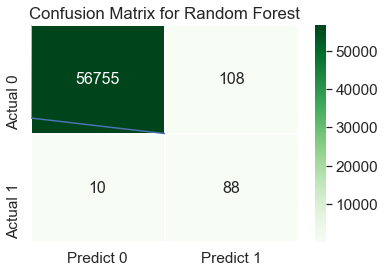

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[56764    99]
 [   16    82]]


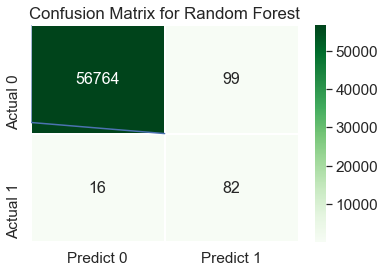

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[56789    74]
 [   15    83]]


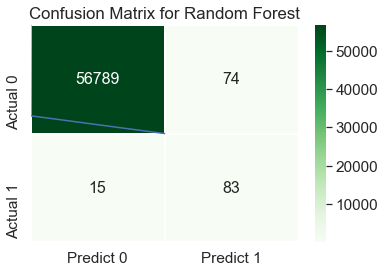

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[56727   136]
 [   14    86]]


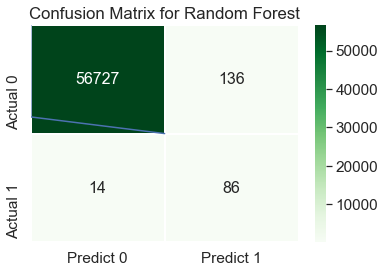

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9979284256476415, 'sensitivity': 0.8597551020408163, 'specificity': 0.9981675254559205, 'precision': 0.45297531685554693, 'f1': 0.5918015092213355, 'auc': 0.9289613137483684, 'actual_accuracy': 0.9227642276422765}


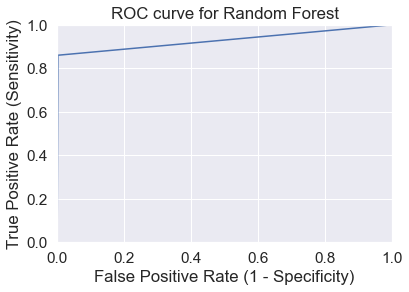

In [54]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'naive', 'RandomForest', 'Random Forest', 5)

In [55]:
results['final']

{'accuracy': 0.9979284256476415,
 'sensitivity': 0.8597551020408163,
 'specificity': 0.9981675254559205,
 'precision': 0.45297531685554693,
 'f1': 0.5918015092213355,
 'auc': 0.9289613137483684,
 'actual_accuracy': 0.9227642276422765}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56625   238]
 [   12    86]]


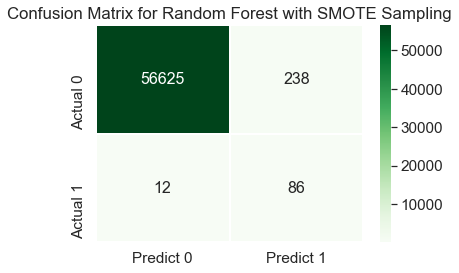

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56618   245]
 [   10    88]]


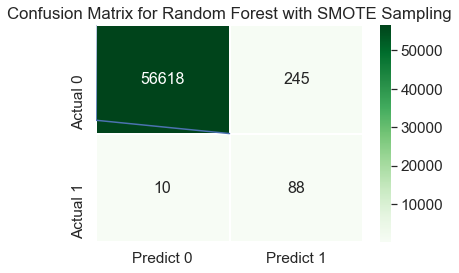

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56649   214]
 [   15    83]]


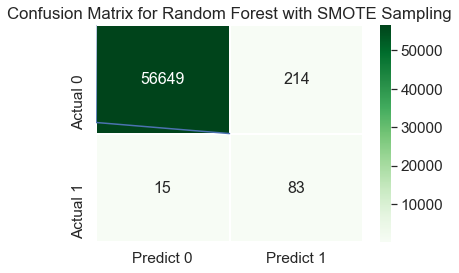

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56716   147]
 [   12    86]]


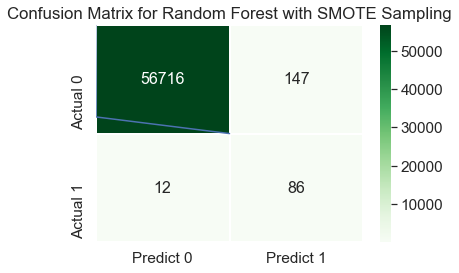

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56634   229]
 [   13    87]]


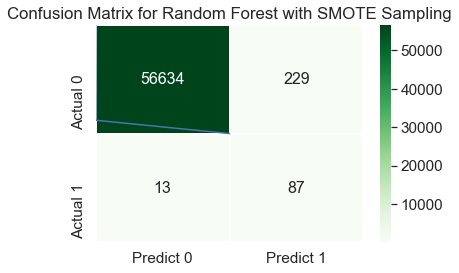

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9960148469891452, 'sensitivity': 0.874, 'specificity': 0.9962260169178553, 'precision': 0.2907145621267061, 'f1': 0.43481909283278497, 'auc': 0.9351130084589275, 'actual_accuracy': 0.9052845528455284}


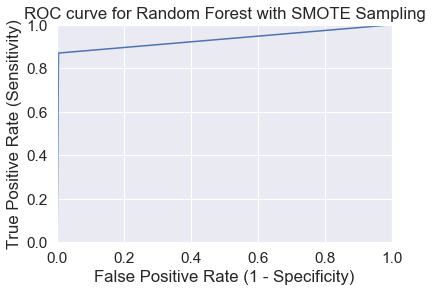

In [56]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'smote', 'RandomForest', 'Random Forest with SMOTE Sampling', 5)

In [57]:
results['final']

{'accuracy': 0.9960148469891452,
 'sensitivity': 0.874,
 'specificity': 0.9962260169178553,
 'precision': 0.2907145621267061,
 'f1': 0.43481909283278497,
 'auc': 0.9351130084589275,
 'actual_accuracy': 0.9052845528455284}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56610   253]
 [   12    86]]


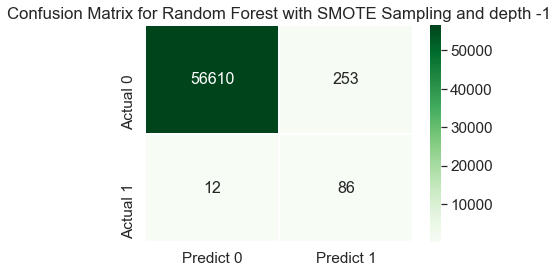

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56601   262]
 [   10    88]]


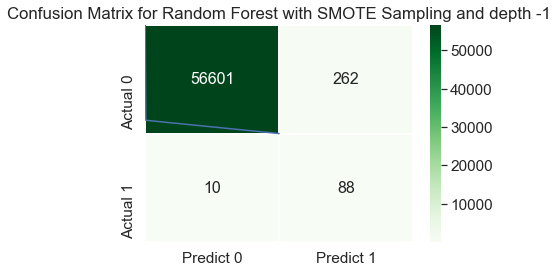

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56602   261]
 [   15    83]]


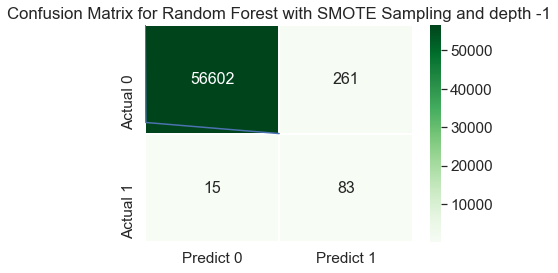

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56634   229]
 [   12    86]]


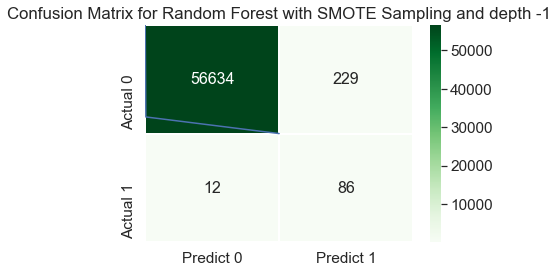

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56600   263]
 [   13    87]]


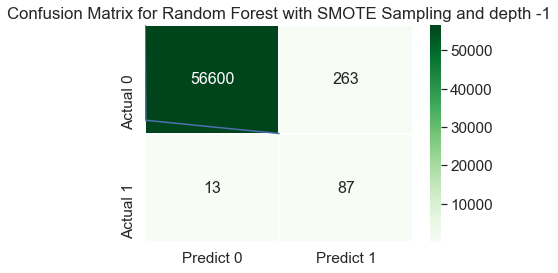

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9953301721897467, 'sensitivity': 0.874, 'specificity': 0.99554015792343, 'precision': 0.25359645168350664, 'f1': 0.3930293977540476, 'auc': 0.934770078961715, 'actual_accuracy': 0.8890243902439025}


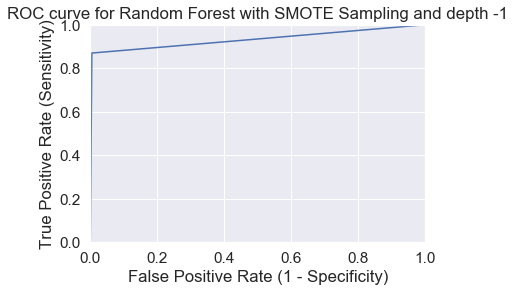

In [58]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'smote', 'RandomForestminus1', 'Random Forest with SMOTE Sampling and depth -1', 5)

In [59]:
results['final']

{'accuracy': 0.9953301721897467,
 'sensitivity': 0.874,
 'specificity': 0.99554015792343,
 'precision': 0.25359645168350664,
 'f1': 0.3930293977540476,
 'auc': 0.934770078961715,
 'actual_accuracy': 0.8890243902439025}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56560   303]
 [   13    85]]


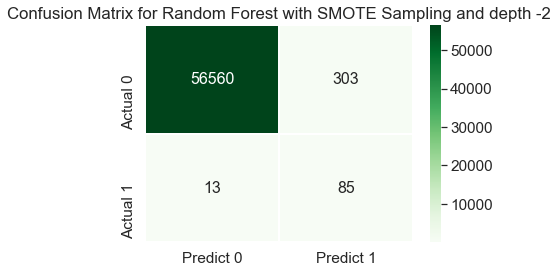

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56573   290]
 [   10    88]]


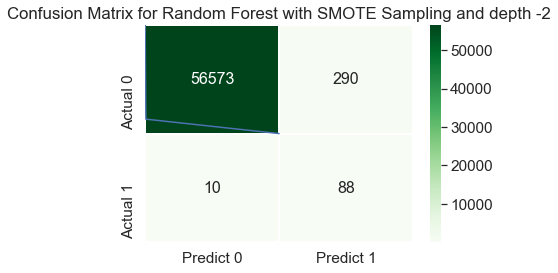

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56575   288]
 [   15    83]]


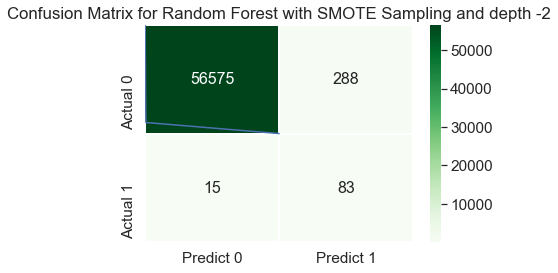

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56602   261]
 [   12    86]]


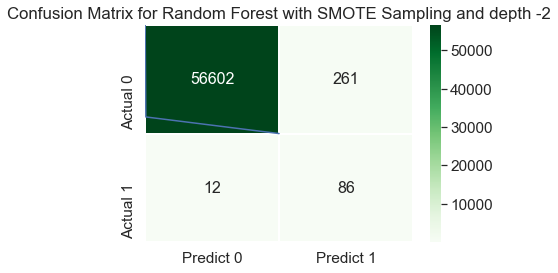

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56562   301]
 [   13    87]]


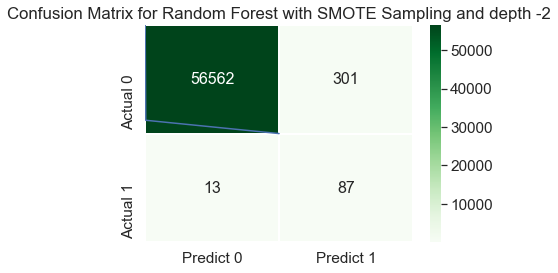

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9947122101953976, 'sensitivity': 0.8719591836734694, 'specificity': 0.9949246434412535, 'precision': 0.2295322990281921, 'f1': 0.36331218634486856, 'auc': 0.9334419135573615, 'actual_accuracy': 0.8808943089430894}


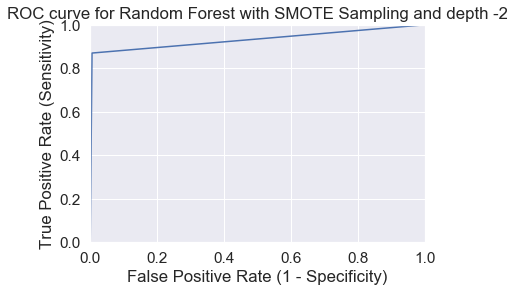

In [60]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'smote', 'RandomForestminus2', 'Random Forest with SMOTE Sampling and depth -2', 5)

In [61]:
results['final']

{'accuracy': 0.9947122101953976,
 'sensitivity': 0.8719591836734694,
 'specificity': 0.9949246434412535,
 'precision': 0.2295322990281921,
 'f1': 0.36331218634486856,
 'auc': 0.9334419135573615,
 'actual_accuracy': 0.8808943089430894}

# Random Forest

### Sampling types:
naive,smote,smote,smote

### Depth:
sqrt(num of features), sqrt(num of features), sqrt(num of features)-1, sqrt(num of features)-2

sensitivity: 0.8598, 0.8740, 0.8740, 0.8720 <br>
precision: 0.4530, 0.2907, 0.2536, 0.2295 <br>
f1: 0.5918, 0.4348, 0.3930, 0.3633 <br>
auc: 0.9290, 0.9351, 0.9348, 0.9334

### Best model is SMOTE sampling with tree depth = sqrt(num of features)
### As number of features/depth decrease, all metrics worsen
## Likely that there is still more room for improvement in sensitivity/auc if we increase depth (possible current underfitting)



## Random Forest has slightly lower AUC (0.9290, 0.9351) than Logistic Regression or SVC but the f1 values (0.5918, 0.4348) and precision (0.4530, 0.2907) is a lot better
### It is a great model in terms of balancing both AUC and f1/precision
### There are lesser False Positive while still keeping a large proportion of right guesses of fraud (True Positive)

# Now, we try to use XGBoost with various depths and sampling (naive, smote) to find it's results

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.023955	validation_1-error:0.021383
[5]	validation_0-error:0.012334	validation_1-error:0.007725
[10]	validation_0-error:0.008184	validation_1-error:0.004494
[15]	validation_0-error:0.006454	validation_1-error:0.003336
[20]	validation_0-error:0.001068	validation_1-error:0.002826
[25]	validation_0-error:0.000835	validation_1-error:0.002142
[30]	validation_0-error:0.00067	validation_1-error:0.001826
[35]	validation_0-error:0.000646	validation_1-error:0.001668
[40]	validation_0-error:0.000561	validation_1-error:0.001545
[45]	validation_0-error:0.000477	validation_1-error:0.001404
[50]	validation_0-error:0.000422	validation_1-error:0.001282
[55]	validation_0-error:0.000352	validation_1-e

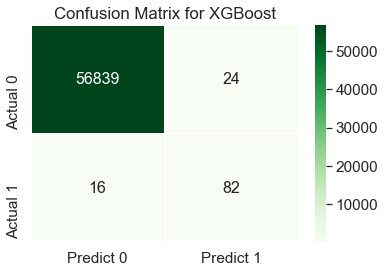

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.030855	validation_1-error:0.016345
[5]	validation_0-error:0.025276	validation_1-error:0.007426
[10]	validation_0-error:0.00858	validation_1-error:0.004793
[15]	validation_0-error:0.004445	validation_1-error:0.003933
[20]	validation_0-error:0.001633	validation_1-error:0.003371
[25]	validation_0-error:0.001499	validation_1-error:0.00309
[30]	validation_0-error:0.001238	validation_1-error:0.002668
[35]	validation_0-error:0.001172	validation_1-error:0.002546
[40]	validation_0-error:0.001071	validation_1-error:0.00251
[45]	validation_0-error:0.000866	validation_1-error:0.002124
[50]	validatio

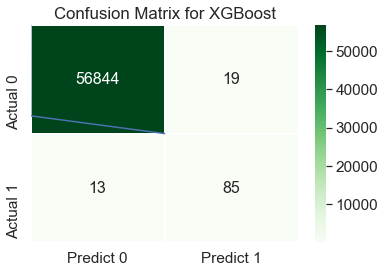

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.022965	validation_1-error:0.027545
[5]	validation_0-error:0.009769	validation_1-error:0.006952
[10]	validation_0-error:0.005412	validation_1-error:0.006004
[15]	validation_0-error:0.003834	validation_1-error:0.005232
[20]	validation_0-error:0.002091	validation_1-error:0.004442
[25]	validation_0-error:0.001679	validation_1-error:0.00381
[30]	validation_0-error:0.001376	validation_1-error:0.003371
[35]	validation_0-error:0.001097	validation_1-error:0.002826
[40]	validation_0-error:0.000947	validation_1-error:0.002352
[45]	validation_0-error:0.000789	validation_1-error:0.002019
[50]	val

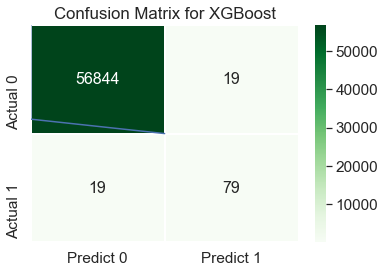

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.029776	validation_1-error:0.00718
[5]	validation_0-error:0.013807	validation_1-error:0.003336
[10]	validation_0-error:0.006727	validation_1-error:0.004055
[15]	validation_0-error:0.002796	validation_1-error:0.003827
[20]	validation_0-error:0.001321	validation_1-error:0.003494
[25]	validation_0-error:0.001121	validation_1-error:0.00323
[30]	validation_0-error:0.000868	validation_1-error:0.002686
[35]	validation_0-error:0.000723	validation_1-error:0.002212
[40]	validation_0-error:0.000605	validation_1-error:0.002054
[45]	validation_0-error:0.000554	validation_1-error:0.001984
[50]	vali

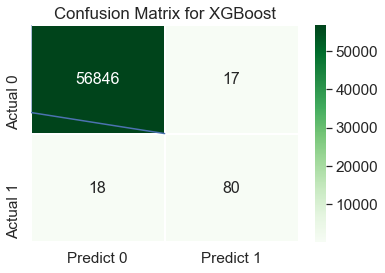

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.023908	validation_1-error:0.010621
[5]	validation_0-error:0.018558	validation_1-error:0.007795
[10]	validation_0-error:0.009719	validation_1-error:0.005425
[15]	validation_0-error:0.0029	validation_1-error:0.004108
[20]	validation_0-error:0.001372	validation_1-error:0.003599
[25]	validation_0-error:0.001038	validation_1-error:0.002774
[30]	validation_0-error:0.000785	validation_1-error:0.002405
[35]	validation_0-error:0.000666	validation_1-error:0.002036
[40]	validation_0-error:0.000554	validation_1-error:0.001966
[45]	validation_0-error:0.000525	validation_1-error:0.001826
[50]	validation_0-error:0.000486	validation_1-error:0.001633
[55]	v

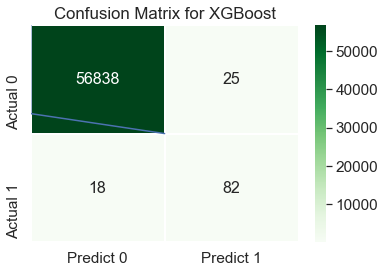

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9993399045302995, 'sensitivity': 0.8293061224489795, 'specificity': 0.9996342085363066, 'precision': 0.7976224910351628, 'f1': 0.8128823055873342, 'auc': 0.914470165492643, 'actual_accuracy': 0.7963414634146343}


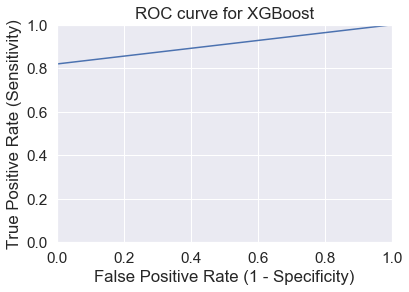

In [29]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoost', 'XGBoost', 5)

In [30]:
results

{'accuracy': [0.9992977651375503,
  0.9994382121100402,
  0.9993328768806727,
  0.9993855444953564,
  0.9992451240278778],
 'actual_accuracy': [0.8089430894308943,
  0.7987804878048781,
  0.7845528455284553,
  0.7967479674796748,
  0.7926829268292683],
 'sensitivity': [0.8367346938775511,
  0.8673469387755102,
  0.8061224489795918,
  0.8163265306122449,
  0.82],
 'specificity': [0.9995779329265075,
  0.9996658635668185,
  0.9996658635668185,
  0.9997010358229429,
  0.9995603467984454],
 'precision': [0.7735849056603774,
  0.8173076923076923,
  0.8061224489795918,
  0.8247422680412371,
  0.7663551401869159],
 'f1': [0.803921568627451,
  0.8415841584158416,
  0.806122448979592,
  0.8205128205128205,
  0.7922705314009661],
 'auc': [0.9181563134020293,
  0.9335064011711643,
  0.9028941562732052,
  0.908013783217594,
  0.9097801733992227],
 'final': {'accuracy': 0.9993399045302995,
  'sensitivity': 0.8293061224489795,
  'specificity': 0.9996342085363066,
  'precision': 0.7976224910351628,
 

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.035537	validation_1-error:0.019434
[5]	validation_0-error:0.026441	validation_1-error:0.010516
[10]	validation_0-error:0.019485	validation_1-error:0.009498
[15]	validation_0-error:0.016061	validation_1-error:0.007057
[20]	validation_0-error:0.010514	validation_1-error:0.006145
[25]	validation_0-error:0.007461	validation_1-error:0.005425
[30]	validation_0-error:0.004528	validation_1-error:0.004723
[35]	validation_0-error:0.004095	validation_1-error:0.004143
[40]	validation_0-error:0.003915	validation_1-error:0.003494
[45]	validation_0-error:0.002425	validation_1-error:0.002862
[50]	validation_0-error:0.001084	validation_1-error:0.002897
[55]	validation_0-error:0.000963	validation_1-

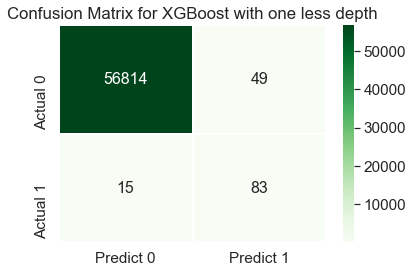

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.035867	validation_1-error:0.029195
[5]	validation_0-error:0.029987	validation_1-error:0.017064
[10]	validation_0-error:0.021376	validation_1-error:0.00776
[15]	validation_0-error:0.015318	validation_1-error:0.005706
[20]	validation_0-error:0.010266	validation_1-error:0.005618
[25]	validation_0-error:0.002379	validation_1-error:0.005021
[30]	validation_0-error:0.002088	validation_1-error:0.004547
[35]	validation_0-error:0.002016	validation_1-error:0.004301
[40]	validation_0-error:0.001787	validation_1-error:0.003792
[45]	validation_0-error:0.001611	validation_1-error:0.003318
[50]	validat

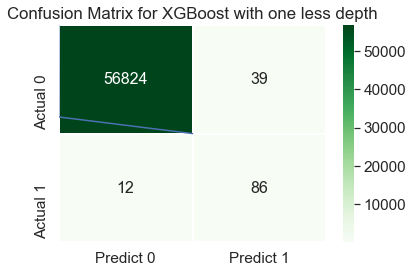

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.032972	validation_1-error:0.016783
[5]	validation_0-error:0.021134	validation_1-error:0.009006
[10]	validation_0-error:0.013966	validation_1-error:0.01034
[15]	validation_0-error:0.013284	validation_1-error:0.008936
[20]	validation_0-error:0.00843	validation_1-error:0.006619
[25]	validation_0-error:0.006766	validation_1-error:0.005829
[30]	validation_0-error:0.005144	validation_1-error:0.00539
[35]	validation_0-error:0.003555	validation_1-error:0.004828
[40]	validation_0-error:0.003282	validation_1-error:0.004249
[45]	validation_0-error:0.001838	validation_1-error:0.00395
[50]	valida

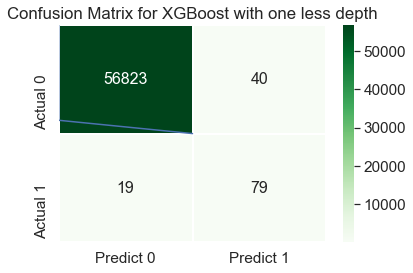

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.036091	validation_1-error:0.010095
[5]	validation_0-error:0.02541	validation_1-error:0.006303
[10]	validation_0-error:0.019367	validation_1-error:0.006864
[15]	validation_0-error:0.015997	validation_1-error:0.00546
[20]	validation_0-error:0.012036	validation_1-error:0.004881
[25]	validation_0-error:0.010523	validation_1-error:0.004512
[30]	validation_0-error:0.00652	validation_1-error:0.004161
[35]	validation_0-error:0.005087	validation_1-error:0.003704
[40]	validation_0-error:0.003803	validation_1-error:0.003564
[45]	validation_0-error:0.002381	validation_1-error:0.003283
[50]	valid

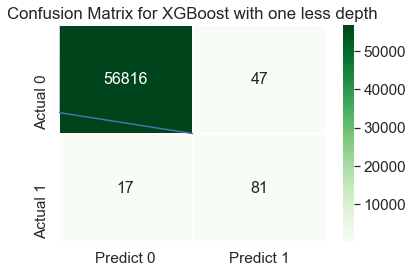

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.030941	validation_1-error:0.018275
[5]	validation_0-error:0.025284	validation_1-error:0.011727
[10]	validation_0-error:0.021712	validation_1-error:0.009304
[15]	validation_0-error:0.015616	validation_1-error:0.00718
[20]	validation_0-error:0.010048	validation_1-error:0.006039
[25]	validation_0-error:0.005966	validation_1-error:0.005196
[30]	validation_0-error:0.0045	validation_1-error:0.004705
[35]	validation_0-error:0.003229	validation_1-error:0.004477
[40]	validation_0-error:0.003056	validation_1-error:0.00402
[45]	validation_0-error:0.001618	validation_1-error:0.003458
[50]	validation_0-error:0.001468	validation_1-error:0.003213
[55]	val

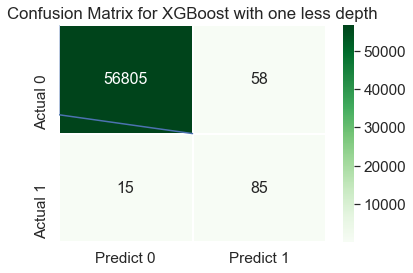

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9989080337882665, 'sensitivity': 0.8414285714285714, 'specificity': 0.9991804864323022, 'precision': 0.6415743038823921, 'f1': 0.7275105629203815, 'auc': 0.9203045289304368, 'actual_accuracy': 0.8004065040650407}


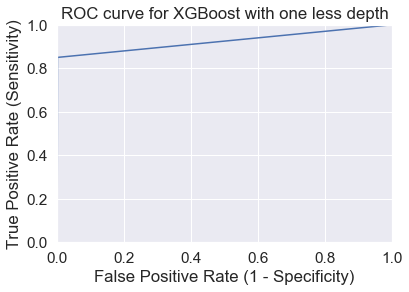

In [31]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoostminus1', 'XGBoost with one less depth', 5)

In [32]:
results['final']

{'accuracy': 0.9989080337882665,
 'sensitivity': 0.8414285714285714,
 'specificity': 0.9991804864323022,
 'precision': 0.6415743038823921,
 'f1': 0.7275105629203815,
 'auc': 0.9203045289304368,
 'actual_accuracy': 0.8004065040650407}

In [33]:
results

{'accuracy': [0.9988764242200804,
  0.9991046505503766,
  0.9989642035778866,
  0.9988764242200804,
  0.9987184663729087],
 'actual_accuracy': [0.8089430894308943,
  0.8028455284552846,
  0.7865853658536586,
  0.7987804878048781,
  0.8048780487804879],
 'sensitivity': [0.8469387755102041,
  0.8775510204081632,
  0.8061224489795918,
  0.826530612244898,
  0.85],
 'specificity': [0.999138279724953,
  0.9993141410055748,
  0.9992965548775126,
  0.9991734519810773,
  0.9989800045723933],
 'precision': [0.6287878787878788,
  0.688,
  0.6638655462184874,
  0.6328125,
  0.5944055944055944],
 'f1': [0.7217391304347825,
  0.7713004484304932,
  0.7281105990783411,
  0.7168141592920354,
  0.6995884773662552],
 'auc': [0.9230385276175785,
  0.938432580706869,
  0.9027095019285521,
  0.9128520321129876,
  0.9244900022861967],
 'final': {'accuracy': 0.9989080337882665,
  'sensitivity': 0.8414285714285714,
  'specificity': 0.9991804864323022,
  'precision': 0.6415743038823921,
  'f1': 0.7275105629203

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.018894	validation_1-error:0.011341
[5]	validation_0-error:0.009791	validation_1-error:0.005425
[10]	validation_0-error:0.00366	validation_1-error:0.002686
[15]	validation_0-error:0.001143	validation_1-error:0.002563
[20]	validation_0-error:0.000703	validation_1-error:0.001949
[25]	validation_0-error:0.000435	validation_1-error:0.00144
[30]	validation_0-error:0.000389	validation_1-error:0.001352
[35]	validation_0-error:0.000306	validation_1-error:0.001229
[40]	validation_0-error:0.00024	validation_1-error:0.001141
[45]	validation_0-error:0.000204	validation_1-error:0.000983
[50]	validation_0-error:0.000152	validation_1-error:0.000878
[55]	validation_0-error:0.000112	validation_1-err

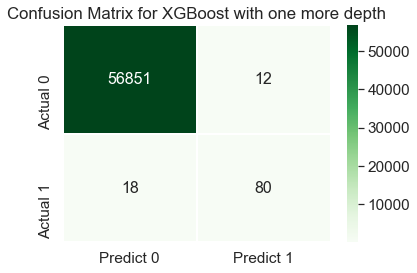

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.020259	validation_1-error:0.017837
[5]	validation_0-error:0.0088	validation_1-error:0.00481
[10]	validation_0-error:0.004434	validation_1-error:0.003599
[15]	validation_0-error:0.00118	validation_1-error:0.002493
[20]	validation_0-error:0.000769	validation_1-error:0.00158
[25]	validation_0-error:0.000618	validation_1-error:0.001229
[30]	validation_0-error:0.000528	validation_1-error:0.001124
[35]	validation_0-error:0.000466	validation_1-error:0.001018
[40]	validation_0-error:0.00042	validation_1-error:0.000966
[45]	validation_0-error:0.000345	validation_1-error:0.000825
[50]	validation_0

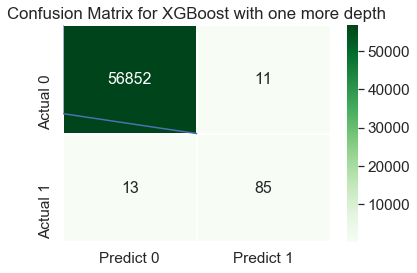

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.014462	validation_1-error:0.013816
[5]	validation_0-error:0.006931	validation_1-error:0.006654
[10]	validation_0-error:0.002807	validation_1-error:0.003459
[15]	validation_0-error:0.001027	validation_1-error:0.002616
[20]	validation_0-error:0.000976	validation_1-error:0.002352
[25]	validation_0-error:0.000807	validation_1-error:0.001984
[30]	validation_0-error:0.000681	validation_1-error:0.001773
[35]	validation_0-error:0.000508	validation_1-error:0.00144
[40]	validation_0-error:0.000442	validation_1-error:0.001299
[45]	validation_0-error:0.00038	validation_1-error:0.001194
[50]	vali

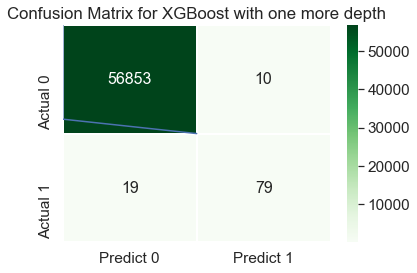

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.026781	validation_1-error:0.010411
[5]	validation_0-error:0.011053	validation_1-error:0.002967
[10]	validation_0-error:0.002044	validation_1-error:0.002616
[15]	validation_0-error:0.000952	validation_1-error:0.002879
[20]	validation_0-error:0.000701	validation_1-error:0.002317
[25]	validation_0-error:0.000554	validation_1-error:0.002054
[30]	validation_0-error:0.00047	validation_1-error:0.001633
[35]	validation_0-error:0.000457	validation_1-error:0.001527
[40]	validation_0-error:0.000382	validation_1-error:0.001404
[45]	validation_0-error:0.000314	validation_1-error:0.001229
[50]	val

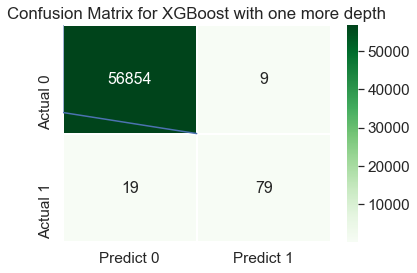

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.017481	validation_1-error:0.02865
[5]	validation_0-error:0.005634	validation_1-error:0.004652
[10]	validation_0-error:0.002302	validation_1-error:0.00302
[15]	validation_0-error:0.002146	validation_1-error:0.002493
[20]	validation_0-error:0.000673	validation_1-error:0.0023
[25]	validation_0-error:0.000541	validation_1-error:0.00172
[30]	validation_0-error:0.000404	validation_1-error:0.001492
[35]	validation_0-error:0.000325	validation_1-error:0.001246
[40]	validation_0-error:0.00024	validation_1-error:0.001106
[45]	validation_0-error:0.000189	validation_1-error:0.000983
[50]	validation_0-error:0.000176	validation_1-error:0.000966
[55]	valid

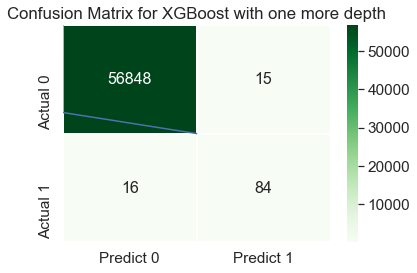

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9995014170693135, 'sensitivity': 0.8271836734693878, 'specificity': 0.9997995181400909, 'precision': 0.8777668909416588, 'f1': 0.8513994360334005, 'auc': 0.9134915958047394, 'actual_accuracy': 0.7873983739837399}


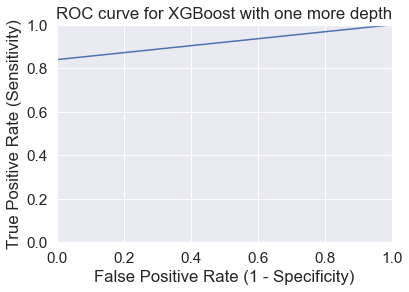

In [34]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoostplus1', 'XGBoost with one more depth', 5)

In [35]:
results['final']

{'accuracy': 0.9995014170693135,
 'sensitivity': 0.8271836734693878,
 'specificity': 0.9997995181400909,
 'precision': 0.8777668909416588,
 'f1': 0.8513994360334005,
 'auc': 0.9134915958047394,
 'actual_accuracy': 0.7873983739837399}

In [36]:
results

{'accuracy': [0.9994733238531627,
  0.9995786590825302,
  0.999490879724724,
  0.9995084355962852,
  0.9994557870898654],
 'actual_accuracy': [0.7987804878048781,
  0.7886178861788617,
  0.8048780487804879,
  0.7886178861788617,
  0.7560975609756098],
 'sensitivity': [0.8163265306122449,
  0.8673469387755102,
  0.8061224489795918,
  0.8061224489795918,
  0.84],
 'specificity': [0.9997889664632538,
  0.999806552591316,
  0.9998241387193781,
  0.9998417248474404,
  0.9997362080790673],
 'precision': [0.8695652173913043,
  0.8854166666666666,
  0.8876404494382022,
  0.8977272727272727,
  0.8484848484848485],
 'f1': [0.8421052631578948,
  0.8762886597938144,
  0.8449197860962567,
  0.849462365591398,
  0.8442211055276383],
 'auc': [0.9080577485377493,
  0.9335767456834131,
  0.902973293849485,
  0.9029820869135162,
  0.9198681040395337],
 'final': {'accuracy': 0.9995014170693135,
  'sensitivity': 0.8271836734693878,
  'specificity': 0.9997995181400909,
  'precision': 0.8777668909416588,
  

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.03907	validation_1-error:0.026931
[5]	validation_0-error:0.025702	validation_1-error:0.013571
[10]	validation_0-error:0.023976	validation_1-error:0.009586
[15]	validation_0-error:0.021565	validation_1-error:0.009164
[20]	validation_0-error:0.017881	validation_1-error:0.009147
[25]	validation_0-error:0.014904	validation_1-error:0.008146
[30]	validation_0-error:0.012414	validation_1-error:0.007883
[35]	validation_0-error:0.010512	validation_1-error:0.007461
[40]	validation_0-error:0.009204	validation_1-error:0.007128
[45]	validation_0-error:0.008136	validation_1-error:0.006566
[50]	validation_0-error:0.007327	validation_1-erro

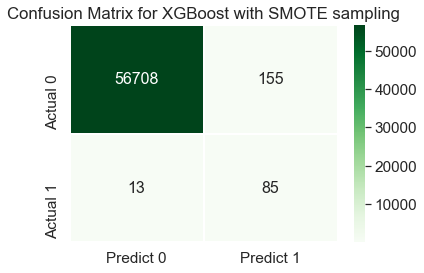

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.033965	validation_1-error:0.038008
[5]	validation_0-error:0.022719	validation_1-error:0.018047
[10]	validation_0-error:0.017375	validation_1-error:0.013641
[15]	validation_0-error:0.01426	validation_1-error:0.01027
[20]	validation_0-error:0.012345	validation_1-error:0.009919
[25]	validation_0-error:0.010633	validation_1-error:0.008953
[30]	validation_0-error:0.009378	validation_1-error:0.00869
[35]	validation_0-error:0.008134	validation_1-error:0.008041
[40]	validation_0-error:0.007215	validation_1-error:0.00776
[45]	validation_0-

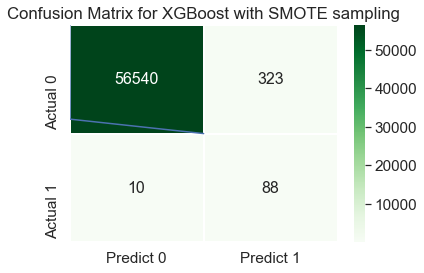

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.032537	validation_1-error:0.031039
[5]	validation_0-error:0.024238	validation_1-error:0.017767
[10]	validation_0-error:0.018441	validation_1-error:0.010376
[15]	validation_0-error:0.016318	validation_1-error:0.008971
[20]	validation_0-error:0.013992	validation_1-error:0.008971
[25]	validation_0-error:0.012181	validation_1-error:0.008901
[30]	validation_0-error:0.010007	validation_1-error:0.008374
[35]	validation_0-error:0.008822	validation_1-error:0.007953
[40]	validation_0-error:0.007454	validation_1-error:0.007057
[45]	valid

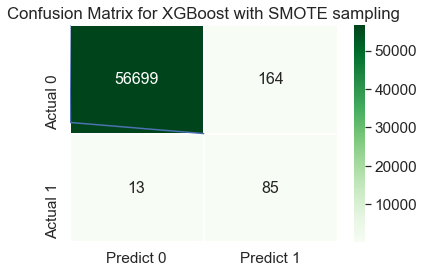

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.037192	validation_1-error:0.049385
[5]	validation_0-error:0.025425	validation_1-error:0.011429
[10]	validation_0-error:0.020866	validation_1-error:0.009076
[15]	validation_0-error:0.018195	validation_1-error:0.008567
[20]	validation_0-error:0.0159	validation_1-error:0.008234
[25]	validation_0-error:0.014876	validation_1-error:0.008128
[30]	validation_0-error:0.012972	validation_1-error:0.007988
[35]	validation_0-error:0.011642	validation_1-error:0.007286
[40]	validation_0-error:0.010407	validation_1-error:0.006864
[45]	validat

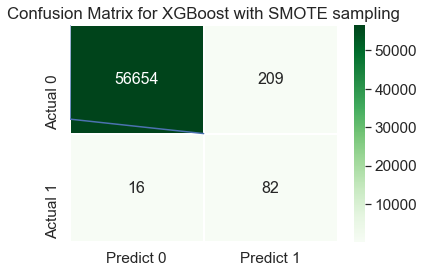

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.035983	validation_1-error:0.036111
[5]	validation_0-error:0.023732	validation_1-error:0.019258
[10]	validation_0-error:0.019024	validation_1-error:0.013202
[15]	validation_0-error:0.016546	validation_1-error:0.011604
[20]	validation_0-error:0.014757	validation_1-error:0.012008
[25]	validation_0-error:0.012829	validation_1-error:0.011376
[30]	validation_0-error:0.011444	validation_1-error:0.01099
[35]	validation_0-error:0.01007	validation_1-error:0.009971
[40]	validation_0-error:0.009103	validation_1-error:0.009533
[45]	validation_0-error:0.008107	validation_1-error:0.008672
[50]	vali

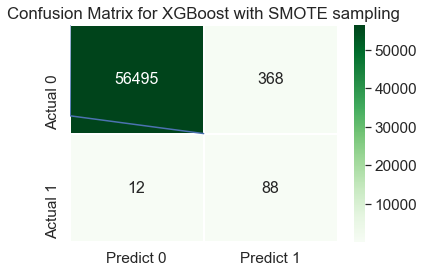

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9954952102034511, 'sensitivity': 0.8698775510204081, 'specificity': 0.9957125019784394, 'precision': 0.2768826896752565, 'f1': 0.4153577497817095, 'auc': 0.9327950264994238, 'actual_accuracy': 0.7406504065040651}


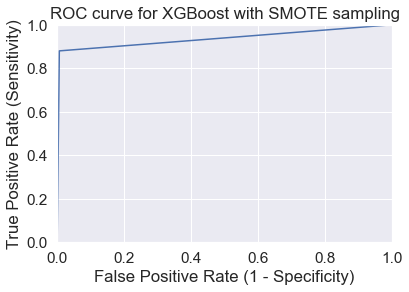

In [37]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'XGBoost', 'XGBoost with SMOTE sampling', 5)

In [38]:
results['final']

{'accuracy': 0.9954952102034511,
 'sensitivity': 0.8698775510204081,
 'specificity': 0.9957125019784394,
 'precision': 0.2768826896752565,
 'f1': 0.4153577497817095,
 'auc': 0.9327950264994238,
 'actual_accuracy': 0.7406504065040651}

# Results:
## XGBoost

Sampling types:
naive,naive,naive,smote

Depth:
sqrt(num of features), sqrt(num of features) - 1, sqrt(num of features) + 1, sqrt(num of features)

sensitivity: 0.8293, 0.8414, 0.8272, 0.8699
precision: 0.7976, 0.6416, 0.8778, 0.2769
f1: 0.8129, 0.7275, 0.8514, 0.4154
auc: 0.9145, 0.9203, 0.9135, 0.9328

## Sensitivity increases when the tree depth is not too deep and SMOTE sampling is used
## f1 and precision is best when tree depth is deeper and naive sampling is used
Likely that there's a tradeoff between overfitting a bit more and getting more True Positive & more False Positive
### SMOTE sampling is also more aggressive and allows model to find more fraud cases, but at the expense of precision
### If we use AUC which is a fairer metric, looks like SMOTE + depth = sqrt(num of features) gives good balance between high sensitivty (important in fraud) but not toopoor precision
### However if precision is key here, using a tree with greater depth and naive sampling is better (Case 3 has high precision of 0.8778)


# Run pipeline with SVM models
## We try linear SVM, with both naive/smote sampling, and different C regularization values (C=1 default, C=2, C=0.5)
### The lower the C, the more the regularization, which is good for noisy dataset

In [34]:
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55820  1043]
 [    6    92]]


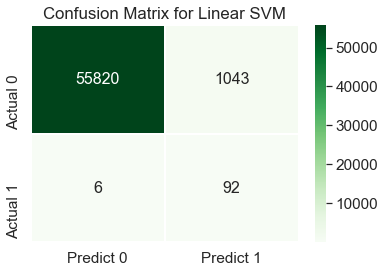

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55655  1208]
 [   10    88]]


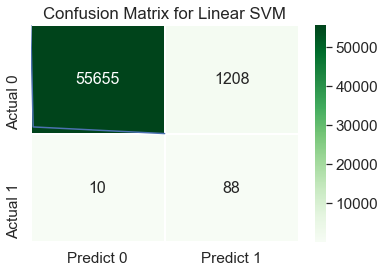

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55882   981]
 [   11    87]]


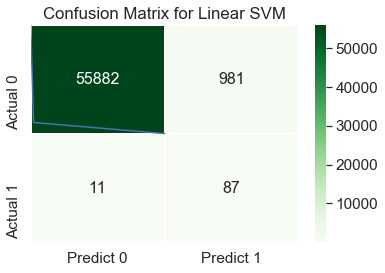

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55800  1063]
 [    9    89]]


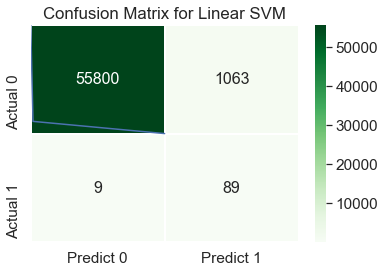

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55731  1132]
 [   13    87]]


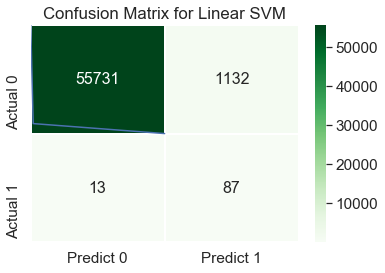

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9807729506207206, 'sensitivity': 0.9005306122448979, 'specificity': 0.9809120166013049, 'precision': 0.07580921945635594, 'f1': 0.139806230368216, 'auc': 0.9407213144231015, 'actual_accuracy': 0.9121951219512194}


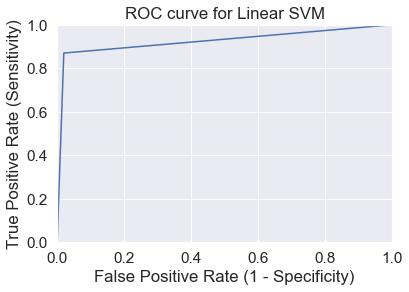

In [35]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear', 'Linear SVM', 5)

In [36]:
results['final']

{'accuracy': 0.9807729506207206,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.9809120166013049,
 'precision': 0.07580921945635594,
 'f1': 0.139806230368216,
 'auc': 0.9407213144231015,
 'actual_accuracy': 0.9121951219512194}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55820  1043]
 [    6    92]]


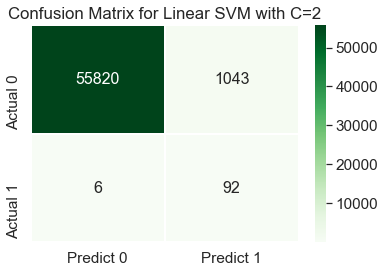

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[55650  1213]
 [   10    88]]


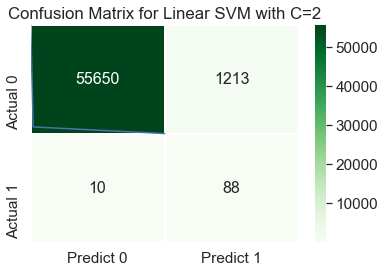

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55880   983]
 [   11    87]]


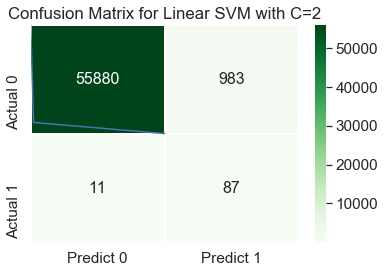

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55795  1068]
 [    9    89]]


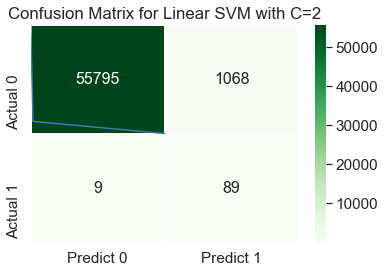

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55732  1131]
 [   13    87]]


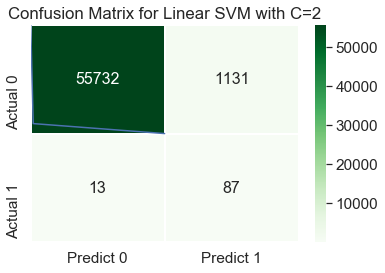

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9807343275800067, 'sensitivity': 0.9005306122448979, 'specificity': 0.9808733271195681, 'precision': 0.0756715209998583, 'f1': 0.1395714297562733, 'auc': 0.9407019696822332, 'actual_accuracy': 0.9121951219512194}


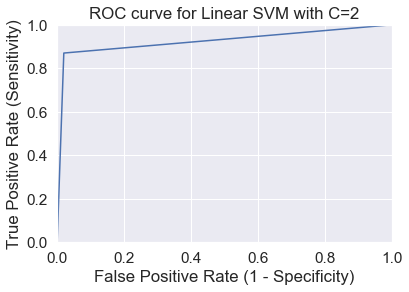

In [37]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear2', 'Linear SVM with C=2', 5)

In [38]:
results['final']

{'accuracy': 0.9807343275800067,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.9808733271195681,
 'precision': 0.0756715209998583,
 'f1': 0.1395714297562733,
 'auc': 0.9407019696822332,
 'actual_accuracy': 0.9121951219512194}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55824  1039]
 [    6    92]]


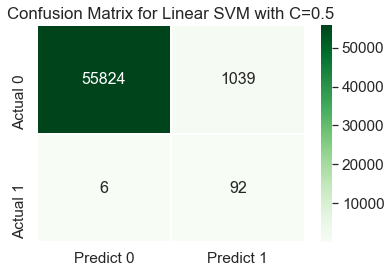

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55668  1195]
 [   10    88]]


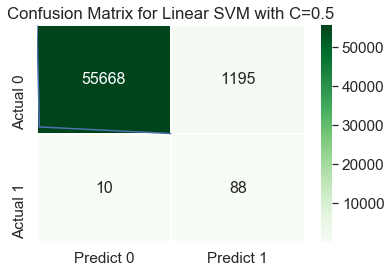

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55881   982]
 [   11    87]]


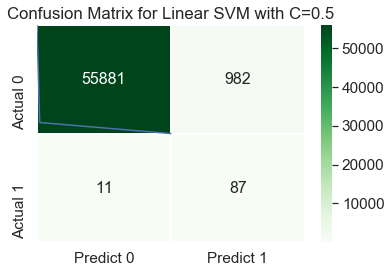

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55803  1060]
 [    9    89]]


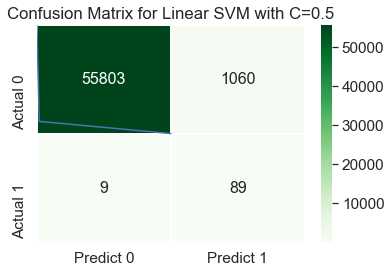

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55727  1136]
 [   13    87]]


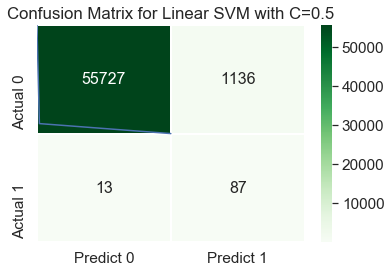

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9808256187285208, 'sensitivity': 0.9005306122448979, 'specificity': 0.9809647749854916, 'precision': 0.07598257360273035, 'f1': 0.1401042421022062, 'auc': 0.9407476936151946, 'actual_accuracy': 0.9117886178861788}


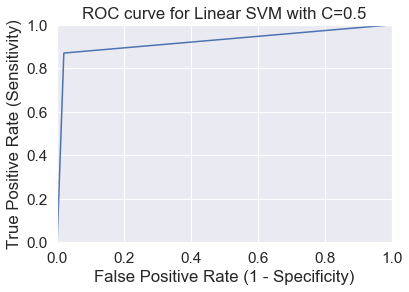

In [39]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear0.5', 'Linear SVM with C=0.5', 5)

In [40]:
results['final']

{'accuracy': 0.9808256187285208,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.9809647749854916,
 'precision': 0.07598257360273035,
 'f1': 0.1401042421022062,
 'auc': 0.9407476936151946,
 'actual_accuracy': 0.9117886178861788}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55811  1052]
 [    7    91]]


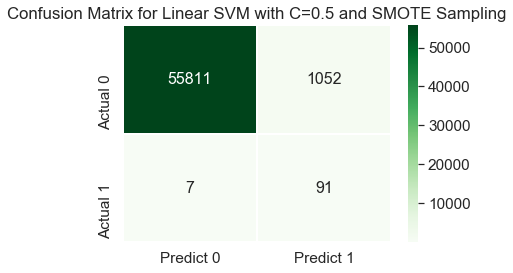

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55506  1357]
 [   10    88]]


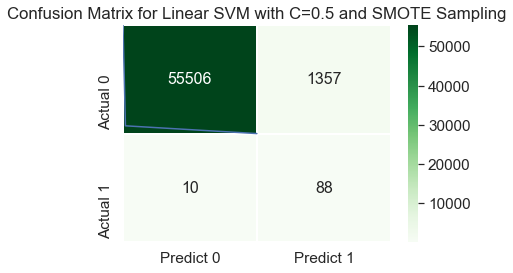

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55824  1039]
 [   11    87]]


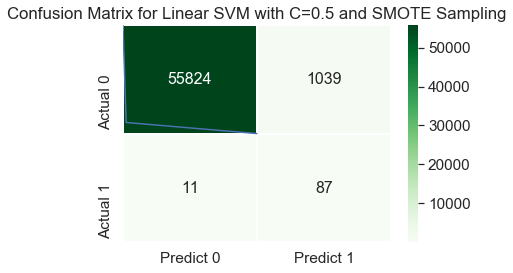

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55746  1117]
 [    9    89]]


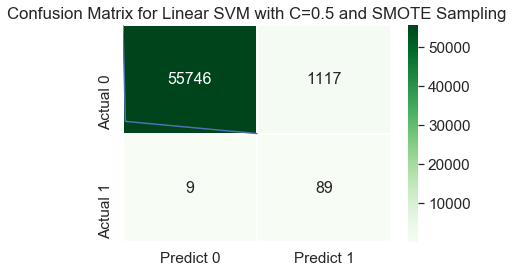

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55643  1220]
 [   13    87]]


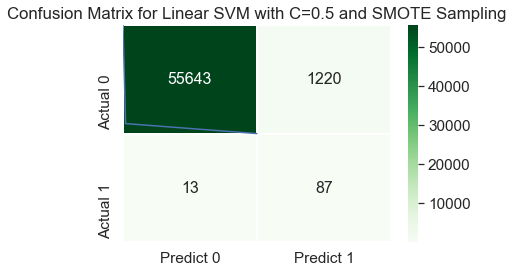

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.979512449891186, 'sensitivity': 0.8984897959183673, 'specificity': 0.9796528498320525, 'precision': 0.07162833717784875, 'f1': 0.13260934858184598, 'auc': 0.9390713228752098, 'actual_accuracy': 0.9113821138211383}


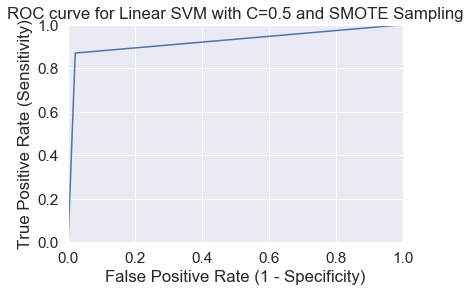

In [41]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'SVM_Linear0.5', 'Linear SVM with C=0.5 and SMOTE Sampling', 5)

In [42]:
results['final']

{'accuracy': 0.979512449891186,
 'sensitivity': 0.8984897959183673,
 'specificity': 0.9796528498320525,
 'precision': 0.07162833717784875,
 'f1': 0.13260934858184598,
 'auc': 0.9390713228752098,
 'actual_accuracy': 0.9113821138211383}

### Turns out that SVM has very good AUC values, like logistic regression, although the precision and f1 scores are lower
### This means these models can detect more fraud cases (recall higher) which is very valuable for fraud detection

# SVM was confirmed to have the highest AUC value with C=0.5 and naive sampling
## Previously, we have confirmed that V24 can be removed during forward selection as it was above significance level
## Hence we run a new model of SVM with feature V24 removed
### We try both naive and smote sampling

In [43]:
varlist2 = []
for col in varlist:
    if col != 'V24':
        varlist2.append(col)
print(varlist2)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55824  1039]
 [    6    92]]


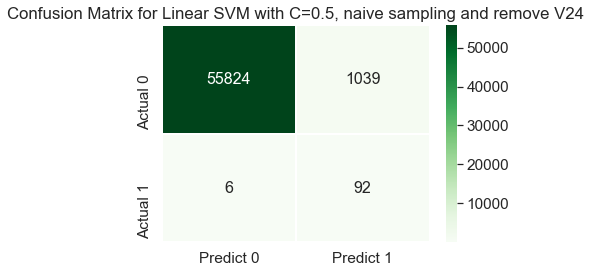

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55670  1193]
 [   10    88]]


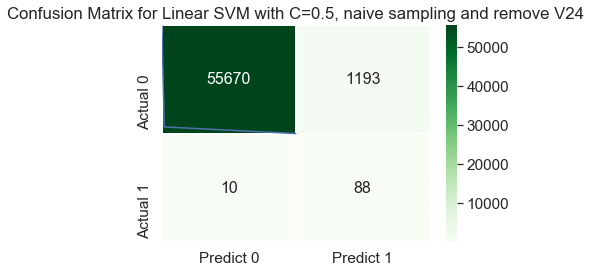

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55878   985]
 [   11    87]]


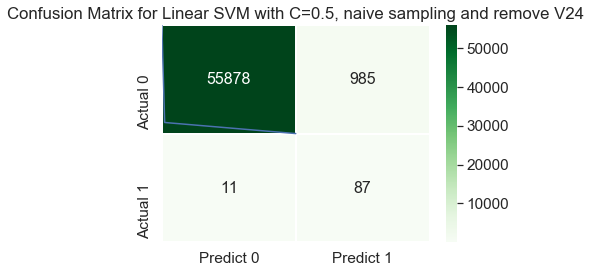

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55782  1081]
 [    9    89]]


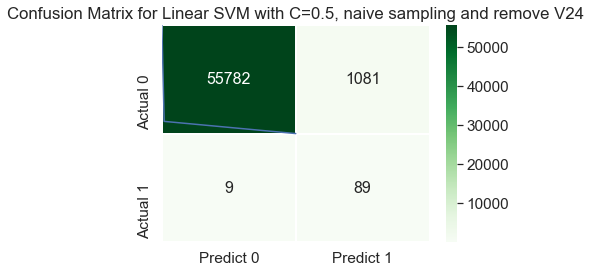

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55747  1116]
 [   13    87]]


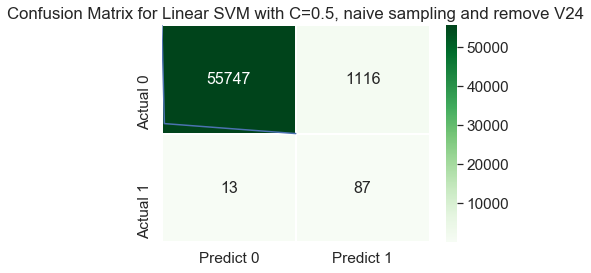

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9808185939143138, 'sensitivity': 0.9005306122448979, 'specificity': 0.9809577405342665, 'precision': 0.07591691377712417, 'f1': 0.13999568379061458, 'auc': 0.9407441763895822, 'actual_accuracy': 0.9117886178861788}


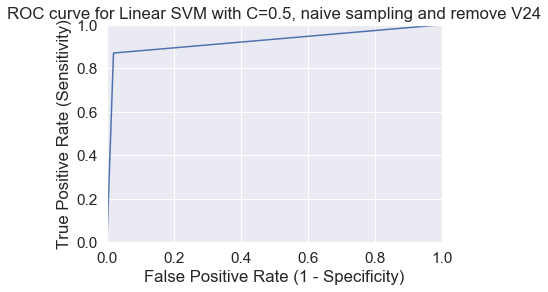

In [44]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist2, 'Class', True, 'naive', 'SVM_Linear0.5', 'Linear SVM with C=0.5, naive sampling and remove V24', 5)

In [45]:
results['final']

{'accuracy': 0.9808185939143138,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.9809577405342665,
 'precision': 0.07591691377712417,
 'f1': 0.13999568379061458,
 'auc': 0.9407441763895822,
 'actual_accuracy': 0.9117886178861788}

In [46]:
print(varlist2)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55775  1088]
 [    7    91]]


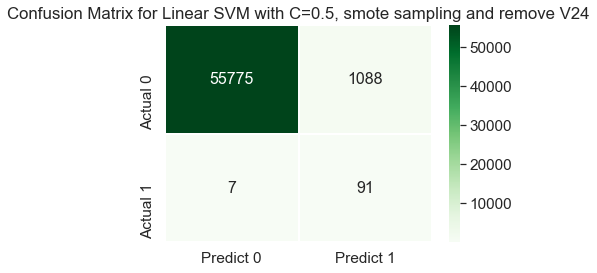

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55517  1346]
 [   10    88]]


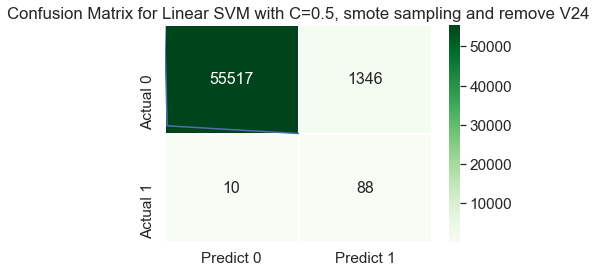

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55790  1073]
 [   10    88]]


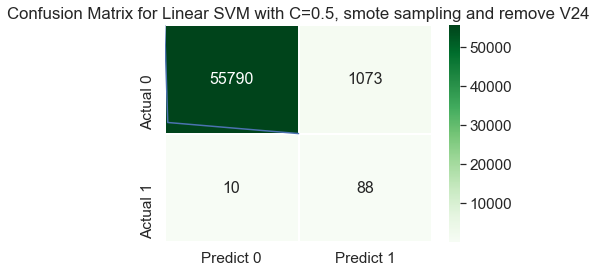

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55707  1156]
 [    8    90]]


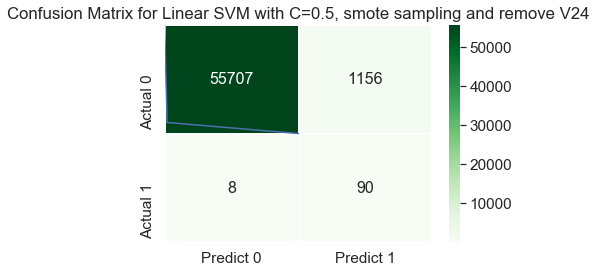

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55621  1242]
 [   12    88]]


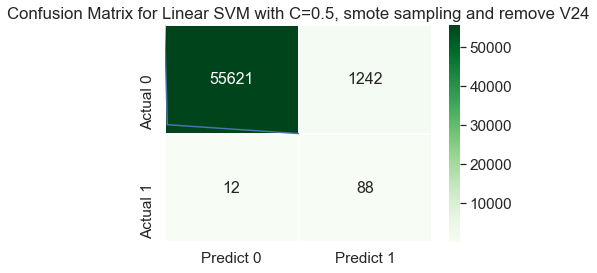

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9791016450855144, 'sensitivity': 0.9045714285714286, 'specificity': 0.9792307827585601, 'precision': 0.07054882811203875, 'f1': 0.13084060455491373, 'auc': 0.9419011056649944, 'actual_accuracy': 0.9130081300813009}


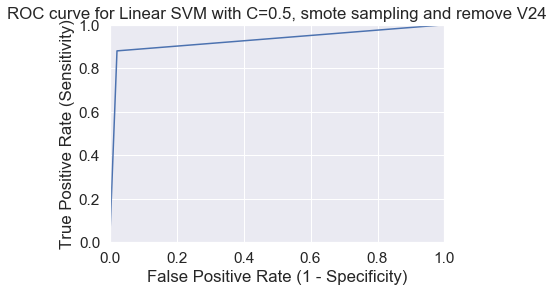

In [47]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist2, 'Class', True, 'smote', 'SVM_Linear0.5', 'Linear SVM with C=0.5, smote sampling and remove V24', 5)

In [48]:
results

{'accuracy': [0.9807763206404382,
  0.9761942381629536,
  0.9809869910991731,
  0.9795649655027124,
  0.9779857100222952],
 'actual_accuracy': [0.9085365853658537,
  0.9146341463414634,
  0.9146341463414634,
  0.9105691056910569,
  0.9166666666666666],
 'sensitivity': [0.9285714285714286,
  0.8979591836734694,
  0.8979591836734694,
  0.9183673469387755,
  0.88],
 'specificity': [0.9808662926683432,
  0.9763290716282996,
  0.981130084589276,
  0.9796704359601147,
  0.9781580289467668],
 'precision': [0.07718405428329092,
  0.061366806136680614,
  0.07579672695951765,
  0.07223113964686999,
  0.06616541353383458],
 'f1': [0.14252153484729835,
  0.11488250652741513,
  0.1397934868943606,
  0.13392857142857142,
  0.12307692307692307],
 'auc': [0.954718860619886,
  0.9371441276508846,
  0.9395446341313727,
  0.9490188914494451,
  0.9290790144733834],
 'final': {'accuracy': 0.9791016450855144,
  'sensitivity': 0.9045714285714286,
  'specificity': 0.9792307827585601,
  'precision': 0.07054882

In [49]:
results['final']

{'accuracy': 0.9791016450855144,
 'sensitivity': 0.9045714285714286,
 'specificity': 0.9792307827585601,
 'precision': 0.07054882811203875,
 'f1': 0.13084060455491373,
 'auc': 0.9419011056649944,
 'actual_accuracy': 0.9130081300813009}